In [50]:
import pandas as pd
daily_data = pd.read_csv("/home/zyyuan/project1/try/out_market_data/20251017_SHFE_ag2512.csv")
daily_data[['bv1','av1','bv2','av2','bp1','ap1','bp2','ap2','volume']]
daily_data['hms'] = pd.to_datetime(daily_data['hms'])
ms_delta = pd.to_timedelta(daily_data['ms'], unit='ms')
daily_data['timestamp'] = daily_data['hms'] + ms_delta
daily_data['total_ask_amt'] = (
    daily_data['ap1'] * daily_data['av1'] + 
    daily_data['ap2'] * daily_data['av2']  
    # daily_data['ap3'] * daily_data['av3'] + 
    # daily_data['ap4'] * daily_data['av4'] + 
    # daily_data['ap5'] * daily_data['av5']
)
daily_data['total_ask_vol'] = daily_data[['av1', 'av2', 'av3', 'av4', 'av5']].sum(axis=1)
daily_data['total_ask_vol'] = daily_data[['av1', 'av2']].sum(axis=1)
# 计算加权 Ask Price
daily_data['vwap_ask'] = daily_data['total_ask_amt'] / daily_data['total_ask_vol']

# 2. 计算买方 (Bid) 的总挂单金额和总挂单量
daily_data['total_bid_amt'] = (
    daily_data['bp1'] * daily_data['bv1'] + 
    daily_data['bp2'] * daily_data['bv2'] 
    # daily_data['bp3'] * daily_data['bv3'] + 
    # daily_data['bp4'] * daily_data['bv4'] + 
    # daily_data['bp5'] * daily_data['bv5']
)
daily_data['total_bid_vol'] = daily_data[['bv1', 'bv2', 'bv3', 'bv4', 'bv5']].sum(axis=1)
daily_data['total_bid_vol'] = daily_data[['bv1', 'bv2']].sum(axis=1)
daily_data['vwap_bid'] = daily_data['total_bid_amt'] / daily_data['total_bid_vol']
daily_data['deep_spread'] = daily_data['vwap_ask'] - daily_data['vwap_bid']

# 可选：与 Level 1 Spread 做对比，观察流动性斜率
daily_data['l1_spread'] = daily_data['ap1'] - daily_data['bp1']
daily_data['l2_spread'] = daily_data['ap2'] - daily_data['bp2']
daily_data['l3_spread'] = daily_data['ap3'] - daily_data['bp3']
daily_data['l4_spread'] = daily_data['ap4'] - daily_data['bp4']
daily_data['l5_spread'] = daily_data['ap5'] - daily_data['bp5']
daily_data['liquidity_slope'] = daily_data['deep_spread'] - daily_data['l1_spread']
daily_data['mid_price'] = (daily_data['ap1']+daily_data['bp1'])/2
daily_data.loc[daily_data['bp1'] == 0, 'mid_price'] = daily_data.loc[daily_data['bp1'] == 0, 'ap1']
daily_data.loc[daily_data['ap1'] == 0, 'mid_price'] = daily_data.loc[daily_data['ap1'] == 0, 'bp1']
daily_data['vwap_300'] = (daily_data['turnover'].diff(600) / (daily_data['volume'].diff(600)*15)).shift(-600)
daily_data['label'] = (daily_data['vwap_300'] - daily_data['mid_price']).abs()
daily_data['deep_mean'] = daily_data['deep_spread'].rolling(120).mean()
daily_data['deep_std'] = daily_data['deep_spread'].rolling(120).std()
daily_data['upper_bound'] = daily_data['deep_mean'] + 2 * daily_data['deep_std']
daily_data['lower_bound'] = (daily_data['deep_mean'] - 2 * daily_data['deep_std']).clip(lower=0)
daily_data['deep_mean'].corr(daily_data['label'])

np.float64(0.17228700783154235)

In [59]:
main_data = pd.read_csv("/home/zyyuan/market_data_ag2512/20250918_SHFE_ag2512.csv")
second_data = pd.read_csv("/home/zyyuan/market_data_ag2512/20250918_SHFE_ag2512.csv")


In [60]:
main_data

,type,source,trade_day,action_day,inst,hms,ms,last,volume,bp1,...,ordercnt_ask2,ordercnt_bid3,ordercnt_ask3,ordercnt_bid4,ordercnt_ask4,ordercnt_bid5,ordercnt_ask5,bid_total_price,ask_total_price,depth
0,D,M,2025-09-18,2025-09-17,ag2512,2025-09-17 18:35:18,500,NaN,0,NaN,...,0,0,0,0,0,0,0,0,0,5
1,D,M,2025-09-18,2025-09-17,ag2512,2025-09-17 20:59:00,500,9924.0,979,9924.0,...,0,0,0,0,0,0,0,0,0,5
2,D,M,2025-09-18,2025-09-17,ag2512,2025-09-17 21:00:00,500,9937.0,1354,9930.0,...,0,0,0,0,0,0,0,0,0,5
3,D,M,2025-09-18,2025-09-17,ag2512,2025-09-17 21:00:01,0,9932.0,1715,9932.0,...,0,0,0,0,0,0,0,0,0,5
4,D,M,2025-09-18,2025-09-17,ag2512,2025-09-17 21:00:01,500,9934.0,1889,9930.0,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62076,D,M,2025-09-18,2025-09-18,ag2512,2025-09-18 14:59:58,500,9837.0,646004,9835.0,...,0,0,0,0,0,0,0,0,0,5
62077,D,M,2025-09-18,2025-09-18,ag2512,2025-09-18 14:59:59,0,9837.0,646013,9835.0,...,0,0,0,0,0,0,0,0,0,5
62078,D,M,2025-09-18,2025-09-18,ag2512,2025-09-18 14:59:59,500,9837.0,646016,9837.0,...,0,0,0,0,0,0,0,0,0,5
62079,D,M,2025-09-18,2025-09-18,ag2512,2025-09-18 15:00:00,0,9835.0,646031,9835.0,...,0,0,0,0,0,0,0,0,0,5


In [21]:
for window in [30,60,120,300,600]:
    daily_data['l1_spread_mean'] = daily_data['l1_spread'].rolling(window).mean()
    print(window,daily_data['l1_spread_mean'].corr(daily_data['label']))

30 0.1539219180617222
60 0.17909375724037824
120 0.19852821459236253
300 0.1700030494325321
600 0.15099356477015535


In [25]:
for window in [30,60,120,300,600]:
    daily_data['deep_mean'] = daily_data['deep_spread'].rolling(window).mean()
    print(window,daily_data['deep_mean'].corr(daily_data['label']))

30 0.12794531099632922
60 0.1522686316631747
120 0.17228700783154235
300 0.15213501621944106
600 0.13768499835706047


In [28]:
for window in [30,60,120,300,600]:
    daily_data['sweep_mean'] = daily_data['sweep_spread'].rolling(window).mean()
    print(window,daily_data['sweep_mean'].corr(daily_data['label']))

30 0.12661274767465439
60 0.1430025819873198
120 0.15544633854841247
300 0.13506514200919897
600 0.11947536598619538


In [27]:
def calculate_sweep_cost(row, target_vol=10, side='ask'):
    """
    计算吃掉 target_vol 手单子的加权平均价格
    """
    remains = target_vol
    total_cost = 0
    
    # 遍历 5 档
    for i in range(1, 6):
        p = row[f'{side}p{i}']
        v = row[f'{side}v{i}']
        
        take = min(remains, v)
        total_cost += take * p
        remains -= take
        
        if remains <= 0:
            break
            
    # 如果 5 档吃完还不够 (说明流动性枯竭)，用最后一档价格填补剩余
    # 或者返回 NaN 表示无法在该深度成交
    if remains > 0:
        total_cost += remains * row[f'{side}p5'] 
        
    return total_cost / target_vol
daily_data['ask_sweep_price'] = daily_data.apply(lambda x: calculate_sweep_cost(x, target_vol=20, side='a'), axis=1)
daily_data['bid_sweep_price'] = daily_data.apply(lambda x: calculate_sweep_cost(x, target_vol=20, side='b'), axis=1)
daily_data['sweep_spread'] = daily_data['ask_sweep_price'] - daily_data['bid_sweep_price']
daily_data['sweep_spread'].describe()

count    66588.000000
mean         2.006066
std          0.818509
min          1.000000
25%          1.450000
50%          1.950000
75%          2.400000
max         17.200000
Name: sweep_spread, dtype: float64

In [70]:
import numpy as np
daily_data['trade_qty'] = daily_data['volume'].diff().fillna(0.0)
window_size = 20
daily_data['dynamic_target_size'] = daily_data['trade_qty'].rolling(window=window_size).sum()
def get_weighted_price(row, price_cols, vol_cols, target_vol):
    """
    row: 单行数据
    price_cols: ['ap1', 'ap2'...]
    vol_cols: ['av1', 'av2'...]
    target_vol: 本次需要吃掉的量
    """
    remains = target_vol
    total_cost = 0
    
    # 遍历 5 档
    for p_col, v_col in zip(price_cols, vol_cols):
        p = row[p_col]
        v = row[v_col]
        
        take = min(remains, v)     # 能吃多少吃多少
        total_cost += take * p
        remains -= take
        
        if remains <= 0:
            break
    
    # 【惩罚机制】如果 5 档全吃完还不够
    # 实际场景下这代表流动性击穿。我们假设剩下的量在第 5 档价格基础上再加价成交
    if remains > 0:
        # 假设惩罚价格是第5档价格 + 2个 tick (模拟更深层的冲击)
        penalty_price = row[price_cols[-1]] + 0.2 
        total_cost += remains * penalty_price
        
    return total_cost / target_vol
ask_prices = [f'ap{i}' for i in range(1, 6)]
ask_vols = [f'av{i}' for i in range(1, 6)]

daily_data['dynamic_ask_price'] = daily_data.apply(
    lambda x: get_weighted_price(x, ask_prices, ask_vols, x['dynamic_target_size']/40), 
    axis=1
)
bid_prices = [f'bp{i}' for i in range(1, 6)]
bid_vols = [f'bv{i}' for i in range(1, 6)]

daily_data['dynamic_bid_price'] = daily_data.apply(
    lambda x: get_weighted_price(x, bid_prices, bid_vols, x['dynamic_target_size']/40), 
    axis=1
)
daily_data['dynamic_spread'] = daily_data['dynamic_ask_price'] - daily_data['dynamic_bid_price']
daily_data['dynamic_spread'].describe()

count    66570.000000
mean         1.942589
std          1.025883
min          1.000000
25%          1.037037
50%          1.782982
75%          2.332220
max         18.624119
Name: dynamic_spread, dtype: float64

In [52]:
for window in [30,60,120,300,600]:
    daily_data['dynamic_mean'] = daily_data['dynamic_spread'].rolling(window).mean()
    print(window,daily_data['dynamic_mean'].corr(daily_data['label']))

30 0.17595592280591188
60 0.18689552006460605
120 0.19211740643572534
300 0.15845092755815052
600 0.12795747709448202


In [ ]:
bid_prices = [f'bp{i}' for i in range(1, 6)]
bid_vols = [f'bv{i}' for i in range(1, 6)]

daily_data['dynamic_bid_price'] = daily_data.apply(
    lambda x: get_weighted_price(x, bid_prices, bid_vols, x['dynamic_target_size']/2), 
    axis=1
)

In [41]:
import pandas as pd
import os
import glob

# ================= 配置区域 =================
# 请将此处替换为您实际的文件夹路径
folder_main = '/home/zyyuan/market_data_ag2512'    # 主力合约文件夹路径
folder_second = '/home/zyyuan/market_data_ag2604' # 不活跃合约文件夹路径

# 假设文件是CSV格式，如果不是请修改后缀，例如 '*.xlsx'
file_pattern = '*.csv' 
import numpy as np

def get_weighted_price(row, price_cols, vol_cols, target_vol):
    """
    row: 单行数据
    price_cols: ['ap1', 'ap2'...]
    vol_cols: ['av1', 'av2'...]
    target_vol: 本次需要吃掉的量
    """
    # =======================================================
    # [修改点] 处理目标量 <= 0 (或 NaN) 的情况
    # 此时直接返回该方向的第一档价格 (L1 Price)
    # =======================================================
    if target_vol <= 0 or np.isnan(target_vol):
        return row[price_cols[0]]
    # if target_vol<5:
    #     target_vol = 5
    remains = target_vol
    total_cost = 0
    
    # 遍历 5 档
    for p_col, v_col in zip(price_cols, vol_cols):
        p = row[p_col]
        v = row[v_col]
        if np.isnan(p) or np.isnan(v):
            continue

        take = min(remains, v)
        total_cost += take * p
        remains -= take
        
        if remains <= 0:
            break
    
    if remains > 0:
        last_price = row[price_cols[-1]]
        is_ask = row[price_cols[0]] < row[price_cols[-1]]
        
        if is_ask:
            penalty_price = last_price + 2
        else:
            penalty_price = last_price - 2
            
        total_cost += remains * penalty_price    
    return total_cost / target_vol


def load_and_process_folder(folder_path, label_desc):
    """
    读取指定文件夹下所有文件，并应用Timestamp计算逻辑
    返回：包含该文件夹下所有数据的合并后的DataFrame
    """
    file_list = glob.glob(os.path.join(folder_path, file_pattern))
    data_list = []
    
    print(f"正在处理 {label_desc}，共发现 {len(file_list)} 个文件...")
    
    for file_path in file_list:
        try:
            # 1. 读取数据
            df = pd.read_csv(file_path)
            df['hms'] = pd.to_datetime(df['hms'])
            ms_delta = pd.to_timedelta(df['ms'], unit='ms')
            df['timestamp'] = df['hms'] + ms_delta
            df['l1_spread'] = df['ap1'] - df['bp1']
            df['l2_spread'] = df['ap2'] - df['bp2']
            df['l3_spread'] = df['ap3'] - df['bp3']
            df['l4_spread'] = df['ap4'] - df['bp4']
            df['l5_spread'] = df['ap5'] - df['bp5']
            df['mid_price'] = (df['ap1']+df['bp1'])/2
            df['total_ask_amt'] = (
                df['ap1'] * df['av1'] + 
                df['ap2'] * df['av2'] +
                df['ap3'] * df['av3'] + 
                df['ap4'] * df['av4'] + 
                df['ap5'] * df['av5']
            )
            df['total_ask_vol'] = df[['av1', 'av2', 'av3', 'av4', 'av5']].sum(axis=1)
            df['vwap_ask'] = df['total_ask_amt'] / df['total_ask_vol'].replace(0.0,np.nan)
            df['total_bid_amt'] = (
                df['bp1'] * df['bv1'] + 
                df['bp2'] * df['bv2'] +
                df['bp3'] * df['bv3'] + 
                df['bp4'] * df['bv4'] + 
                df['bp5'] * df['bv5']
            )
            df['total_bid_vol'] = df[['bv1', 'bv2', 'bv3', 'bv4', 'bv5']].sum(axis=1)
            df['vwap_bid'] = df['total_bid_amt'] / df['total_bid_vol'].replace(0.0,np.nan)
            df['deep_spread'] = df['vwap_ask'] - df['vwap_bid']
            df.loc[df['bp1'] == 0, 'mid_price'] = df.loc[df['bp1'] == 0, 'ap1']
            df.loc[df['ap1'] == 0, 'mid_price'] = df.loc[df['ap1'] == 0, 'bp1']
            df['vwap_300'] = (df['turnover'].diff(600) / (df['volume'].diff(600).replace(0,np.nan)*15)).shift(-600)
            df['label'] = (df['vwap_300'] - df['mid_price']).abs()
            df['trade_qty'] = df['volume'].diff().fillna(0.0)
            window_size = 60
            df['dynamic_target_size'] = df['trade_qty'].rolling(window=window_size).sum() 
            ask_prices = [f'ap{i}' for i in range(1, 6)]
            ask_vols = [f'av{i}' for i in range(1, 6)]
            # df['dynamic_ask_price'] = df.apply(
            #     lambda x: get_weighted_price(x, ask_prices, ask_vols, x['dynamic_target_size']/120), 
            #     axis=1
            # )
            # bid_prices = [f'bp{i}' for i in range(1, 6)]
            # bid_vols = [f'bv{i}' for i in range(1, 6)]

            # df['dynamic_bid_price'] = df.apply(
            #     lambda x: get_weighted_price(x, bid_prices, bid_vols, x['dynamic_target_size']/120), 
            #     axis=1
            # )
            # df['dynamic_spread_1tick'] = df['dynamic_ask_price'] - df['dynamic_bid_price']
            # df['dynamic_ask_price'] = df.apply(
            #     lambda x: get_weighted_price(x, ask_prices, ask_vols, x['dynamic_target_size']/12), 
            #     axis=1
            # )
            # bid_prices = [f'bp{i}' for i in range(1, 6)]
            # bid_vols = [f'bv{i}' for i in range(1, 6)]

            # df['dynamic_bid_price'] = df.apply(
            #     lambda x: get_weighted_price(x, bid_prices, bid_vols, x['dynamic_target_size']/12), 
            #     axis=1
            # )
            # df['dynamic_spread_10tick'] = df['dynamic_ask_price'] - df['dynamic_bid_price']
            # df['dynamic_ask_price'] = df.apply(
            #     lambda x: get_weighted_price(x, ask_prices, ask_vols, x['dynamic_target_size']/20), 
            #     axis=1
            # )
            # bid_prices = [f'bp{i}' for i in range(1, 6)]
            # bid_vols = [f'bv{i}' for i in range(1, 6)]

            # df['dynamic_bid_price'] = df.apply(
            #     lambda x: get_weighted_price(x, bid_prices, bid_vols, x['dynamic_target_size']/20), 
            #     axis=1
            # )
            # df['dynamic_spread_6tick'] = df['dynamic_ask_price'] - df['dynamic_bid_price']
            df['dynamic_orderflow'] = df['dynamic_target_size']/60
            df.loc[df['dynamic_orderflow']<3,'dynamic_orderflow'] = 3
            df['dynamic_ask_price'] = df.apply(
                lambda x: get_weighted_price(x, ask_prices, ask_vols, x['dynamic_orderflow']), 
                axis=1
            )
            bid_prices = [f'bp{i}' for i in range(1, 6)]
            bid_vols = [f'bv{i}' for i in range(1, 6)]

            df['dynamic_bid_price'] = df.apply(
                lambda x: get_weighted_price(x, bid_prices, bid_vols, x['dynamic_orderflow']), 
                axis=1
            )
            df['dynamic_spread_2tick'] = df['dynamic_ask_price'] - df['dynamic_bid_price']
            df['l1_spread_mean'] = df['l1_spread'].rolling(120).mean()
            # df['dynamic_mean_1tick'] = df['dynamic_spread_1tick'].rolling(120).mean()
            # df['dynamic_mean_10tick'] = df['dynamic_spread_10tick'].rolling(120).mean()
            # df['dynamic_mean_6tick'] = df['dynamic_spread_6tick'].rolling(120).mean()
            df['dynamic_mean_2tick'] = df['dynamic_spread_2tick'].rolling(120).mean()
            df['deep_spread_mean'] = df['deep_spread'].rolling(120).mean()
            data_list.append(df)
            
        except Exception as e:
            print(f"读取文件出错 {file_path}: {e}")
            
    if data_list:
        # 将该文件夹下所有处理好的数据纵向合并
        total_df = pd.concat(data_list, ignore_index=True)
        return total_df
    else:
        return pd.DataFrame()

# ================= 主程序 =================
if __name__ == "__main__":
    
    # 第一步：分别获得两个处理好的大表
    print(">>> 阶段1：读取主力合约数据")
    df_main_total = load_and_process_folder(folder_main, "主力合约")
    
    print("\n>>> 阶段2：读取不活跃合约数据")
    df_second_total = load_and_process_folder(folder_second, "不活跃合约")
    
    # 检查数据是否读取成功
    if not df_main_total.empty and not df_second_total.empty:
        
        print(f"\n>>> 阶段3：开始合并 (主力: {len(df_main_total)} 行, 不活跃: {len(df_second_total)} 行)")
        final_merged_df = pd.merge(
            df_main_total, 
            df_second_total, 
            on='timestamp', 
            suffixes=('_main', '_second'),
            how='inner' 
        )
        
        print("合并完成！")
        print(final_merged_df.head())
        print(f"最终总行数: {len(final_merged_df)}")
        
    else:
        print("错误：其中一个文件夹未读取到数据，无法合并。")

>>> 阶段1：读取主力合约数据
正在处理 主力合约，共发现 35 个文件...

>>> 阶段2：读取不活跃合约数据
正在处理 不活跃合约，共发现 35 个文件...

>>> 阶段3：开始合并 (主力: 2255563 行, 不活跃: 2070547 行)
合并完成！
  type_main source_main trade_day_main action_day_main inst_main  \
0         D           M     2025-10-13      2025-10-10    ag2512   
1         D           M     2025-10-13      2025-10-10    ag2512   
2         D           M     2025-10-13      2025-10-10    ag2512   
3         D           M     2025-10-13      2025-10-10    ag2512   
4         D           M     2025-10-13      2025-10-10    ag2512   

             hms_main  ms_main  last_main  volume_main  bp1_main  ...  \
0 2025-10-10 18:39:24      500        NaN            0       NaN  ...   
1 2025-10-10 20:59:00      500    11189.0          924   11186.0  ...   
2 2025-10-10 21:00:00      500    11168.0         1448   11168.0  ...   
3 2025-10-10 21:00:01        0    11185.0         2228   11180.0  ...   
4 2025-10-10 21:00:01      500    11179.0         2646   11174.0  ...   

   label_second

In [48]:
import pandas as pd
import numpy as np
import os
import glob

# ================= 配置区域 =================
folder_main = '/home/zyyuan/market_data_ag2512'    # 主力合约文件夹路径
folder_second = '/home/zyyuan/market_data_ag2604' # 不活跃合约文件夹路径
file_pattern = '*.csv' 

# ================= 辅助函数 =================
def get_weighted_price(row, price_cols, vol_cols, target_vol):
    """
    计算吃掉 target_vol 量后的加权均价
    """
    # 处理无效目标量
    if target_vol <= 0 or np.isnan(target_vol):
        return row[price_cols[0]]

    remains = target_vol
    total_cost = 0
    
    # 遍历 5 档
    for p_col, v_col in zip(price_cols, vol_cols):
        p = row[p_col]
        v = row[v_col]
        
        if np.isnan(p) or np.isnan(v):
            continue

        take = min(remains, v)
        total_cost += take * p
        remains -= take
        
        if remains <= 0:
            break
    
    # 惩罚机制
    if remains > 0:
        last_price = row[price_cols[-1]]
        # 简单判断方向: Ask通常价格递增(L1<L5), Bid通常价格递减(L1>L5)
        # 这里严谨一点判断
        is_ask = row[price_cols[0]] < row[price_cols[-1]]
        
        if is_ask:
            penalty_price = last_price + 2  # 卖方深度击穿，价格更高
        else:
            penalty_price = last_price - 2  # 买方深度击穿，价格更低
            
        total_cost += remains * penalty_price    
        
    return total_cost / target_vol

def get_weighted_price_new(row, price_cols, vol_cols, target_vol):
    """
    计算吃掉 target_vol 量后的加权均价
    改进点：当击穿5档时，根据当前盘口密度线性外推剩余量的冲击成本
    """
    # 1. 边界条件处理
    if target_vol <= 0 or np.isnan(target_vol):
        return row[price_cols[0]]

    remains = target_vol
    total_cost = 0
    filled_vol = 0 # 记录前5档实际吃掉的量
    
    # 2. 遍历 5 档撮合
    for p_col, v_col in zip(price_cols, vol_cols):
        p = row[p_col]
        v = row[v_col]
        
        if np.isnan(p) or np.isnan(v):
            continue

        take = min(remains, v)
        total_cost += take * p
        remains -= take
        filled_vol += take
        
        if remains <= 0:
            break
    
    # 3. 【精细化惩罚机制】处理击穿情况
    if remains > 0:
        p1 = row[price_cols[0]]
        p5 = row[price_cols[-1]]
        last_price = p5
        
        # 判断方向 (Ask: P1 < P5, Bid: P1 > P5)
        # 兼容有时候 P1=P5 的情况
        if row[price_cols[0]] < row[price_cols[-1]]:
            is_ask = True # 买入，推高价格
        elif row[price_cols[0]] > row[price_cols[-1]]:
            is_ask = False # 卖出，打压价格
        else:
            # 如果5档价格都一样（极罕见），默认 Ask
            is_ask = True 

        # --- 核心改进：计算流动性斜率 ---
        
        # A. 计算当前5档内的价格跨度 (Price Span)
        price_span = abs(p5 - p1)
        
        # B. 防止除以零：如果5档价格全相同(span=0)或成交量极小
        # 我们设定一个最小的“隐含”跨度，比如 1.0 (假设至少跨越1个单位价格)
        # 或者设为 1个最小跳动点 (Tick Size)，这里假设数据未归一化，用 1.0 或 0.2 做保底
        min_tick = 1.0 
        if price_span < 1e-6:
            price_span = min_tick 
            
        # C. 计算流动性密度 (Density): 每单位价格能容纳多少量
        # 避免 filled_vol 为 0 (虽然极不可能)
        valid_filled_vol = max(filled_vol, 1.0) 
        density = valid_filled_vol / price_span 
        
        # D. 计算剩余量需要的额外滑点 (Additional Slippage)
        # 公式: 需要滑动的价格 = 剩余量 / 密度
        required_slippage = remains / density
        
        # E. 计算剩余部分的加权均价
        # 假设剩余部分的价格分布是从 P5 (加一个Tick) 开始，线性延伸到 P5 + Slippage
        # 平均价格 ≈ 起点 + 滑点/2
        # 我们给起点加一个 min_tick，代表必须跨过第5档才能成交
        avg_slippage = min_tick + (required_slippage / 2)
        
        if is_ask:
            penalty_price = last_price + avg_slippage
        else:
            penalty_price = last_price - avg_slippage
            
        total_cost += remains * penalty_price
        
    return total_cost / target_vol

def get_weighted_price_robust(row, price_cols, vol_cols, target_vol):
    """
    计算吃掉 target_vol 量后的加权均价 (Robust Version)
    改进点：使用平方根阻尼模型替代线性外推，防止高波动下估值过高。
    """
    # 1. 边界条件处理
    if target_vol <= 0 or np.isnan(target_vol):
        return row[price_cols[0]]

    remains = target_vol
    total_cost = 0
    filled_vol = 0
    
    # 2. 遍历 5 档撮合
    for p_col, v_col in zip(price_cols, vol_cols):
        p = row[p_col]
        v = row[v_col]
        
        if np.isnan(p) or np.isnan(v):
            continue

        take = min(remains, v)
        total_cost += take * p
        remains -= take
        filled_vol += take
        
        if remains <= 0:
            break
    
    # 3. 【改进后的惩罚机制】处理击穿情况
    if remains > 0:
        p1 = row[price_cols[0]]
        p5 = row[price_cols[-1]]
        last_price = p5
        
        # 判断方向
        if row[price_cols[0]] < row[price_cols[-1]]:
            is_ask = True
        elif row[price_cols[0]] > row[price_cols[-1]]:
            is_ask = False
        else:
            is_ask = True # 默认

        # --- 新算法：平方根阻尼冲击 ---
        
        # A. 计算当前5档的 "深度宽度" (Width)
        # 用 P5和P1的差值代表当前盘口对于一定量的承载能力
        current_width = abs(p5 - p1)
        
        # B. 基础修正：如果前5档特别平（比如都在一个价位），给一个最小宽度
        min_width = 1.0 # 假设最小变动价位是 1.0 (根据您的合约调整，如白银是1)
        if current_width < 1e-6:
            current_width = min_width

        # C. 计算 "相对击穿倍数" (Impact Ratio)
        # 看看剩余的量 (remains) 是前5档总承载量 (filled_vol) 的多少倍
        # 为了防止 filled_vol 为0 (极罕见)，加个极小值
        total_depth_5 = max(filled_vol, 1.0)
        ratio = remains / total_depth_5
        
        # D. 计算额外冲击 (Extra Slippage)
        # 公式： 额外滑点 = 当前5档宽度 * sqrt(相对倍数) * 敏感度系数
        # sqrt: 抑制线性增长，防止量大时价格飞天
        # 敏感度系数 (0.5): 经验参数，假设5档外的流动性没那么差，稍微打个折
        sensitivity = 0.5 
        
        extra_slippage = current_width * np.sqrt(ratio) * sensitivity
        
        # E. 【安全截断】(Safety Cap)
        # 强制限制最大滑点不超过一定数值（防止数据错误导致的离谱值）
        # 例如：限制最大不超过 5倍的当前宽度 或 20个固定点位
        max_slippage = max(current_width * 5.0, 20.0) 
        extra_slippage = min(extra_slippage, max_slippage)
        
        # F. 计算剩余部分的均价
        # 假设剩余部分成交均价为 P5 偏移 extra_slippage / 2 (梯形面积近似)
        avg_price_deviation = min_width + (extra_slippage / 2)
        
        if is_ask:
            penalty_price = last_price + avg_price_deviation
        else:
            penalty_price = last_price - avg_price_deviation
            
        total_cost += remains * penalty_price
        
    return total_cost / target_vol

def process_single_file_basic(file_path):
    """
    读取单日文件并计算【基础指标】，不包含依赖跨日调整的逻辑
    """
    try:
        df = pd.read_csv(file_path)
        
        # --- 1. 时间处理 ---
        df['hms'] = pd.to_datetime(df['hms'])
        ms_delta = pd.to_timedelta(df['ms'], unit='ms')
        df['timestamp'] = df['hms'] + ms_delta
        
        # --- 2. 基础价差与中间价 ---
        df['l1_spread'] = df['ap1'] - df['bp1']
        df['mid_price'] = (df['ap1'] + df['bp1']) / 2
        # 修正涨跌停
        df.loc[df['bp1'] == 0, 'mid_price'] = df.loc[df['bp1'] == 0, 'ap1']
        df.loc[df['ap1'] == 0, 'mid_price'] = df.loc[df['ap1'] == 0, 'bp1']
        df['vwap_300'] = (df['turnover'].diff(600) / (df['volume'].diff(600).replace(0,np.nan)*15)).shift(-600)
        df['label'] = (df['vwap_300'] - df['mid_price']).abs()
        df['label_dir'] = df['vwap_300'] - df['mid_price']
        # --- 3. 基础 Orderflow 计算 (原始值) ---
        df['trade_qty'] = df['volume'].diff().fillna(0.0)
        window_size = 60
        df['dynamic_target_size'] = df['trade_qty'].rolling(window=window_size).sum()
        
        # 原始的 orderflow，稍后会被调整
        df['dynamic_orderflow'] = df['dynamic_target_size'] / 60
        
        # --- 4. 其他不依赖调整的指标 (VWAP, Deep Spread等) ---
        # (为了节省篇幅，部分非核心指标代码略，保留您的核心逻辑)
        df['total_ask_amt'] = sum(df[f'ap{i}'] * df[f'av{i}'] for i in range(1, 6))
        df['total_ask_vol'] = df[[f'av{i}' for i in range(1, 6)]].sum(axis=1)
        df['vwap_ask'] = df['total_ask_amt'] / df['total_ask_vol'].replace(0.0, np.nan)
        
        df['total_bid_amt'] = sum(df[f'bp{i}'] * df[f'bv{i}'] for i in range(1, 6))
        df['total_bid_vol'] = df[[f'bv{i}' for i in range(1, 6)]].sum(axis=1)
        df['vwap_bid'] = df['total_bid_amt'] / df['total_bid_vol'].replace(0.0, np.nan)
        
        df['deep_spread'] = df['vwap_ask'] - df['vwap_bid']

        # 仅保留关键列以节省内存
        return df
        
    except Exception as e:
        print(f"基础处理出错 {file_path}: {e}")
        return None

def apply_dynamic_adjustment_and_calc_spread(daily_dfs):
    """
    核心逻辑：跨日调整系数计算
    daily_dfs: list of DataFrames (已经按日期排序)
    """
    processed_list = []
    
    # 用来存储前一天的中位数
    prev_median_orderflow = None
    
    print("开始进行跨日动态调整计算...")
    
    for i, df in enumerate(daily_dfs):
        # 1. 计算当天原始的 orderflow 中位数 (为下一天做准备)
        current_median = df['dynamic_orderflow'].median()
        
        # 2. 如果是第一天 (i==0)，没有前一天数据，只能跳过或不调整
        if i == 0:
            print(f"Day {i+1}: 第一个交易日，跳过调整 (保留原始值)，当日中位数: {current_median:.4f}")
            # 第一天直接用原始值算
            adjusted_factor = 1.0
        else:
            # 3. 计算调整系数 (基于前一天)
            # 逻辑：如果前一天中位数 < 5，系数 = 5 / 前一天中位数
            # 否则系数 = 1
            if prev_median_orderflow is not None and prev_median_orderflow < 5 and prev_median_orderflow > 0:
                adjusted_factor = 5.0
                print(f"Day {i+1}: 触发调整! 前一日中位数 {prev_median_orderflow:.4f} < 5. 调整系数: {adjusted_factor:.4f}")
            else:
                adjusted_factor = 1.0
                print(f"Day {i+1}: 无需调整. 前一日中位数 {prev_median_orderflow:.4f} >= 5. 系数: 1.0")
        
        # 更新前一日中位数指针
        prev_median_orderflow = current_median
        
        # 4. 应用调整系数到当天的 orderflow
        df['adjusted_orderflow'] = df['dynamic_orderflow'] * adjusted_factor
        
        # 5. 基于【调整后】的 orderflow 重新计算 dynamic_price 和 spread
        ask_prices = [f'ap{i}' for i in range(1, 6)]
        ask_vols = [f'av{i}' for i in range(1, 6)]
        bid_prices = [f'bp{i}' for i in range(1, 6)]
        bid_vols = [f'bv{i}' for i in range(1, 6)]
        
        # 计算 Ask Price
        df['dynamic_ask_price'] = df.apply(
            lambda x: get_weighted_price_robust(x, ask_prices, ask_vols, x['adjusted_orderflow']), 
            axis=1
        )
        
        # 计算 Bid Price
        df['dynamic_bid_price'] = df.apply(
            lambda x: get_weighted_price_robust(x, bid_prices, bid_vols, x['adjusted_orderflow']), 
            axis=1
        )
        
        # 计算最终 Spread
        df['dynamic_spread_2tick'] = df['dynamic_ask_price'] - df['dynamic_bid_price']
        
        df['impact_ask'] = (df['dynamic_ask_price'] - df['ap1'])
        df['impact_bid'] = (df['bp1'] - df['dynamic_bid_price'])
        df['liquidity_skewness'] = df['impact_ask'] - df['impact_bid']
        df['liquidity_skew_mean'] = df['liquidity_skewness'].rolling(120).mean()
        df['dynamic_mean_2tick'] = df['dynamic_spread_2tick'].rolling(120).mean()
        
        processed_list.append(df)
        
    return processed_list

def load_and_process_folder_pipeline(folder_path, label_desc):
    file_list = sorted(glob.glob(os.path.join(folder_path, file_pattern)))
    daily_dfs = []
    
    print(f"\n=== 正在处理 {label_desc}，共 {len(file_list)} 个文件 ===")
    
    # 步骤 1: 读取所有文件并做基础处理
    for file_path in file_list:
        df = process_single_file_basic(file_path)
        if df is not None:
            daily_dfs.append(df)
            
    if not daily_dfs:
        return pd.DataFrame()
    
    # 步骤 2: 跨日动态调整
    final_dfs = apply_dynamic_adjustment_and_calc_spread(daily_dfs)
    
    # 步骤 3: 合并
    if final_dfs:
        return pd.concat(final_dfs[1:], ignore_index=True)
    else:
        return pd.DataFrame()

# ================= 主程序 =================
if __name__ == "__main__":
    
    # 阶段1：读取主力合约 (主力通常比较活跃，可能不需要经常调整，但逻辑通用)
    df_main_total = load_and_process_folder_pipeline(folder_main, "主力合约")
    
    # 阶段2：读取不活跃合约 (这里是调整逻辑发挥作用的主要地方)
    df_second_total = load_and_process_folder_pipeline(folder_second, "不活跃合约")
    
    # 阶段3：合并
    if not df_main_total.empty and not df_second_total.empty:
        print(f"\n>>> 开始合并 (主力: {len(df_main_total)} 行, 不活跃: {len(df_second_total)} 行)")
        df_origin = pd.merge(
            df_main_total, 
            df_second_total, 
            on='timestamp', 
            suffixes=('_main', '_second'),
            how='inner' 
        )
        
        print("合并完成！前5行预览：")
        # 打印看看调整后的 orderflow
        cols_to_show = ['timestamp', 'adjusted_orderflow_main', 'dynamic_spread_2tick_main', 
                        'adjusted_orderflow_second', 'dynamic_spread_2tick_second']
        # 注意：列名带后缀，根据merge结果调整查看
        print(df_origin.filter(regex='timestamp|adjusted_orderflow|dynamic_spread').head())
        
    else:
        print("错误：数据读取失败。")


=== 正在处理 主力合约，共 35 个文件 ===
开始进行跨日动态调整计算...
Day 1: 第一个交易日，跳过调整 (保留原始值)，当日中位数: 6.5333
Day 2: 无需调整. 前一日中位数 6.5333 >= 5. 系数: 1.0
Day 3: 无需调整. 前一日中位数 6.1000 >= 5. 系数: 1.0
Day 4: 无需调整. 前一日中位数 9.1167 >= 5. 系数: 1.0
Day 5: 无需调整. 前一日中位数 9.2667 >= 5. 系数: 1.0
Day 6: 无需调整. 前一日中位数 8.0833 >= 5. 系数: 1.0
Day 7: 无需调整. 前一日中位数 7.2833 >= 5. 系数: 1.0
Day 8: 无需调整. 前一日中位数 9.5167 >= 5. 系数: 1.0
Day 9: 无需调整. 前一日中位数 16.9000 >= 5. 系数: 1.0
Day 10: 无需调整. 前一日中位数 9.8833 >= 5. 系数: 1.0
Day 11: 无需调整. 前一日中位数 14.7167 >= 5. 系数: 1.0
Day 12: 无需调整. 前一日中位数 17.9500 >= 5. 系数: 1.0
Day 13: 无需调整. 前一日中位数 23.2000 >= 5. 系数: 1.0
Day 14: 无需调整. 前一日中位数 22.1167 >= 5. 系数: 1.0
Day 15: 无需调整. 前一日中位数 23.4333 >= 5. 系数: 1.0
Day 16: 无需调整. 前一日中位数 24.0333 >= 5. 系数: 1.0
Day 17: 无需调整. 前一日中位数 31.9333 >= 5. 系数: 1.0
Day 18: 无需调整. 前一日中位数 23.8667 >= 5. 系数: 1.0
Day 19: 无需调整. 前一日中位数 17.6833 >= 5. 系数: 1.0
Day 20: 无需调整. 前一日中位数 13.9000 >= 5. 系数: 1.0
Day 21: 无需调整. 前一日中位数 11.1833 >= 5. 系数: 1.0
Day 22: 无需调整. 前一日中位数 10.7833 >= 5. 系数: 1.0
Day 23: 无需调整. 前一日中位数 7.9167 

KeyboardInterrupt: 

In [53]:
import pandas as pd
import numpy as np
import os
import glob
import warnings

# 忽略 pandas 的一些切片警告
warnings.filterwarnings('ignore')

# ================= 配置区域 =================
folder_main = '/home/zyyuan/market_data_ag2512'    # 主力合约
folder_second = '/home/zyyuan/market_data_ag2604'  # 不活跃合约
file_pattern = '*.csv' 

# ================= 算法函数 (保持您认可的 Robust 版本) =================
def get_weighted_price_robust(row, price_cols, vol_cols, target_vol):
    """
    计算吃掉 target_vol 量后的加权均价 (Robust Version)
    包含平方根阻尼模型
    """
    if target_vol <= 0 or np.isnan(target_vol):
        return row[price_cols[0]]

    remains = target_vol
    total_cost = 0
    filled_vol = 0
    
    for p_col, v_col in zip(price_cols, vol_cols):
        p = row[p_col]
        v = row[v_col]
        if np.isnan(p) or np.isnan(v): continue

        take = min(remains, v)
        total_cost += take * p
        remains -= take
        filled_vol += take
        if remains <= 0: break
    
    if remains > 0:
        p1 = row[price_cols[0]]
        p5 = row[price_cols[-1]]
        last_price = p5
        
        # 判断方向
        if row[price_cols[0]] < row[price_cols[-1]]: is_ask = True
        elif row[price_cols[0]] > row[price_cols[-1]]: is_ask = False
        else: is_ask = True 

        current_width = abs(p5 - p1)
        min_width = 1.0 
        if current_width < 1e-6: current_width = min_width

        total_depth_5 = max(filled_vol, 1.0)
        ratio = remains / total_depth_5
        sensitivity = 0.5 
        
        extra_slippage = current_width * np.sqrt(ratio) * sensitivity
        max_slippage = max(current_width * 5.0, 20.0) 
        extra_slippage = min(extra_slippage, max_slippage)
        
        avg_price_deviation = min_width + (extra_slippage / 2)
        
        if is_ask: penalty_price = last_price + avg_price_deviation
        else: penalty_price = last_price - avg_price_deviation
            
        total_cost += remains * penalty_price
        
    return total_cost / target_vol

# ================= 基础数据处理 (仅读取和清洗) =================
def process_single_file_basic(file_path):
    """
    读取单日文件，计算基础指标，返回 DataFrame 和 当日总成交量
    """
    try:
        df = pd.read_csv(file_path)
        
        # 1. 时间处理
        df['hms'] = pd.to_datetime(df['hms'])
        ms_delta = pd.to_timedelta(df['ms'], unit='ms')
        df['timestamp'] = df['hms'] + ms_delta
        
        # 2. 基础价差
        df['mid_price'] = (df['ap1'] + df['bp1']) / 2
        df.loc[df['bp1'] == 0, 'mid_price'] = df.loc[df['bp1'] == 0, 'ap1']
        df.loc[df['ap1'] == 0, 'mid_price'] = df.loc[df['ap1'] == 0, 'bp1']
        df['vwap_300'] = (df['turnover'].diff(600) / (df['volume'].diff(600).replace(0,np.nan)*15)).shift(-600)
        df['label'] = (df['vwap_300'] - df['mid_price']).abs()
        df['label_dir'] = (df['vwap_300'] - df['mid_price'])
        # 3. 计算 Orderflow (原始值)
        df['trade_qty'] = df['volume'].diff().fillna(0.0)
        window_size = 60
        df['dynamic_target_size'] = df['trade_qty'].rolling(window=window_size).sum()
        df['dynamic_orderflow'] = df['dynamic_target_size'] / 60
        
        # 4. 获取当日总成交量 (用于后续计算比例)
        # 假设 volume 是累积成交量，取最后一个非空值减去第一个
        # total_vol = df['volume'].iloc[-1] - df['volume'].iloc[0]
        total_vol = df['volume'].iloc[-1]
        return df, total_vol, df['hms'].dt.date.iloc[0]
        
    except Exception as e:
        print(f"基础处理出错 {file_path}: {e}")
        return None, 0, None

def calc_final_spread(df, is_main, multiplier=1.0):
    """
    应用调整系数并计算最终价差
    """
    # 1. 应用调整系数
    # 主力合约 multiplier 通常为 1.0
    # 非主力合约 multiplier = prev_main_vol / prev_second_vol
    df['adjusted_orderflow'] = df['dynamic_orderflow'] * multiplier
    
    # 2. 准备列名
    ask_prices = [f'ap{i}' for i in range(1, 6)]
    ask_vols = [f'av{i}' for i in range(1, 6)]
    bid_prices = [f'bp{i}' for i in range(1, 6)]
    bid_vols = [f'bv{i}' for i in range(1, 6)]
    
    # 3. 计算动态 Ask/Bid (使用 Robust 算法)
    df['dynamic_ask_price'] = df.apply(
        lambda x: get_weighted_price_robust(x, ask_prices, ask_vols, x['adjusted_orderflow']), 
        axis=1
    )
    
    df['dynamic_bid_price'] = df.apply(
        lambda x: get_weighted_price_robust(x, bid_prices, bid_vols, x['adjusted_orderflow']), 
        axis=1
    )
    
    # 4. 计算价差
    suffix = '_main' if is_main else '_second'
    col_name = f'dynamic_spread_robust{suffix}'
    
    # 注意：这里直接生成带后缀的列名，方便后续合并
    df[col_name] = df['dynamic_ask_price'] - df['dynamic_bid_price']
    df['impact_ask'] = (df['dynamic_ask_price'] - df['ap1'])
    df['impact_bid'] = (df['bp1'] - df['dynamic_bid_price'])
    df['liquidity_skewness'] = df['impact_ask'] - df['impact_bid']
    df['liquidity_skew_mean'] = df['liquidity_skewness'].rolling(120).mean()
    # 滚动均值
    df[f'{col_name}_mean'] = df[col_name].rolling(120).mean()
    return df

# ================= 主控制流 =================
def main_pipeline():
    # 1. 获取文件列表
    files_main = sorted(glob.glob(os.path.join(folder_main, file_pattern)))
    files_second = sorted(glob.glob(os.path.join(folder_second, file_pattern)))
    
    # 2. 预读取所有基础数据 (为了日期对齐)
    # 使用字典存储: date -> raw_dataframe
    # 同时存储成交量: date -> total_volume
    data_map_main = {}
    vol_map_main = {}
    
    data_map_second = {}
    vol_map_second = {}
    
    print(">>> 步骤1: 预读取主力合约数据...")
    for f in files_main:
        df, vol, date = process_single_file_basic(f)
        if df is not None:
            data_map_main[date] = df
            vol_map_main[date] = vol
            
    print(">>> 步骤2: 预读取不活跃合约数据...")
    for f in files_second:
        df, vol, date = process_single_file_basic(f)
        if df is not None:
            data_map_second[date] = df
            vol_map_second[date] = vol
    
    # 3. 找到共有的日期并排序
    common_dates = sorted(list(set(data_map_main.keys()) & set(data_map_second.keys())))
    print(f"\n共找到 {len(common_dates)} 个匹配的交易日。")
    
    final_results = []
    
    # 状态变量：存储前一天的成交量
    prev_vol_main = 0
    prev_vol_second = 0
    
    # 4. 逐日处理 (同步循环)
    print("\n>>> 步骤3: 开始逐日同步计算与调整...")
    for i, date in enumerate(common_dates):
        df_m = data_map_main[date]
        df_s = data_map_second[date]
        
        # --- 核心逻辑: 计算非主力合约的调整系数 ---
        # 只有从第二天开始 (i > 0) 且前一天非主力成交量不为0时，才能计算比例
        if i > 0 and prev_vol_second > 0:
            # 比例 = 前一日主力成交量 / 前一日非主力成交量
            # 含义：如果主力是 100万，非主力是 1万，系数为 100
            # 我们希望非主力的模拟单量扩大 100 倍，来模拟“如果它像主力一样活跃”
            multiplier = prev_vol_main / prev_vol_second
            
            # 安全截断（可选）：防止倍数过分夸张（例如超过500倍）
            if multiplier > 500:
                multiplier = 500
                
            log_msg = f"调整系数: {multiplier:.2f} (Main: {prev_vol_main:.0f} / Second: {prev_vol_second:.0f})"
        else:
            # 第一天，或数据缺失，不调整
            multiplier = 1.0
            log_msg = "首日或数据不足，系数: 1.0"
            
        print(f"[{date}] {log_msg}")
        
        # --- 计算主力合约 (系数固定 1.0) ---
        res_m = calc_final_spread(df_m, is_main=True, multiplier=1.0)
        
        # --- 计算非主力合约 (应用计算出的 Multiplier) ---
        res_s = calc_final_spread(df_s, is_main=False, multiplier=multiplier)
        
        # --- 合并当天结果 ---
        daily_merged = pd.merge(res_m, res_s, on='timestamp', how='inner',suffixes=('_main','_second'))
        daily_merged['date'] = date
        final_results.append(daily_merged)
        
        # --- 更新状态变量 (为下一天做准备) ---
        prev_vol_main = vol_map_main[date]
        prev_vol_second = vol_map_second[date]
        
    # 5. 生成最终大表
    if final_results:
        total_df = pd.concat(final_results[1:], ignore_index=True)
        print("\n>>> 处理完成!")
        print(f"总行数: {len(total_df)}")
        print(total_df.head())
        return total_df
        # 保存
        # total_df.to_csv('final_adjusted_data.csv', index=False)
    else:
        print("未生成任何数据。")

if __name__ == "__main__":
    df_origin = main_pipeline()

>>> 步骤1: 预读取主力合约数据...
>>> 步骤2: 预读取不活跃合约数据...

共找到 34 个匹配的交易日。

>>> 步骤3: 开始逐日同步计算与调整...
[2025-09-17] 首日或数据不足，系数: 1.0
[2025-09-18] 调整系数: 36.13 (Main: 646031 / Second: 17880)
[2025-09-19] 调整系数: 44.31 (Main: 571883 / Second: 12905)
[2025-09-22] 调整系数: 49.13 (Main: 789654 / Second: 16074)
[2025-09-23] 调整系数: 40.04 (Main: 811054 / Second: 20257)
[2025-09-24] 调整系数: 37.93 (Main: 753535 / Second: 19865)
[2025-09-25] 调整系数: 21.27 (Main: 700711 / Second: 32945)
[2025-09-26] 调整系数: 14.81 (Main: 957978 / Second: 64692)
[2025-09-29] 调整系数: 27.38 (Main: 1527083 / Second: 55778)
[2025-10-09] 调整系数: 25.12 (Main: 889020 / Second: 35394)
[2025-10-10] 调整系数: 16.50 (Main: 1701266 / Second: 103115)
[2025-10-13] 调整系数: 22.14 (Main: 1879157 / Second: 84866)
[2025-10-14] 调整系数: 14.47 (Main: 2421975 / Second: 167429)
[2025-10-15] 调整系数: 24.97 (Main: 2033514 / Second: 81424)
[2025-10-16] 调整系数: 19.94 (Main: 2204572 / Second: 110584)
[2025-10-17] 调整系数: 19.57 (Main: 2646253 / Second: 135197)
[2025-10-20] 调整系数: 23.51 (Main: 2

In [3]:
import pandas as pd
import numpy as np
import os
import glob
import warnings

warnings.filterwarnings('ignore')

# ================= 配置区域 =================
folder_main = '/home/zyyuan/market_data_ag2512'
folder_second = '/home/zyyuan/market_data_ag2604'
file_pattern = '*.csv' 

# ================= 核心算法：四种清洗策略 =================
def clean_generate_variants(df):
    """
    识别大单并生成4种不同处理方式的 Volume 列
    Method 1: Truncate (截断)
    Method 2: Neighbor Mean (相邻均值)
    Method 3: Median (五档中位数)
    Method 4: Zero (剔除/置零)
    """
    # 1. 准备动态阈值 (2倍过去30s成交量)
    dynamic_thresh = df['dynamic_target_size'].fillna(0) * 2
    
    # 2. 遍历买卖各5档
    for side in ['av', 'bv']: # av=Ask Vol, bv=Bid Vol
        # 先计算行中位数 (用于 Method 3)
        cols = [f'{side}{i}' for i in range(1, 6)]
        row_medians = df[cols].median(axis=1)
        
        for i in range(1, 6):
            col_name = f'{side}{i}'
            vol = df[col_name]
            
            # --- A. 识别大单 (Mask) ---
            # 逻辑：
            # 1. > 500: 绝对大单
            # 2. 100-500 且 > 动态阈值: 相对大单
            # 3. < 100: 正常
            is_huge = vol > 500
            is_large_dynamic = (vol >= 100) & (vol <= 500) & (vol > dynamic_thresh)
            
            # 异常标记 (Boolean Mask)
            mask_abnormal = is_huge | is_large_dynamic
            
            # --- B. 生成四种变体 ---
            
            # 1. Truncate (截断)
            # >500 截断为 500; 相对大单截断为 dynamic_thresh; 正常保持原值
            val_trunc = np.select(
                [is_huge, is_large_dynamic], 
                [500, dynamic_thresh], 
                default=vol
            )
            df[f'{col_name}_trunc'] = val_trunc
            
            # 2. Neighbor Mean (相邻均值)
            # 正常保留，异常用相邻填充
            if i == 1:
                neighbor_val = df[f'{side}{i+1}'] # 1档用2档
            elif i == 5:
                neighbor_val = df[f'{side}{i-1}'] # 5档用4档
            else:
                neighbor_val = (df[f'{side}{i-1}'] + df[f'{side}{i+1}']) / 2
            
            df[f'{col_name}_neighbor'] = np.where(mask_abnormal, neighbor_val, vol)
            
            # 3. Median (中位数)
            # 正常保留，异常用当行五档中位数填充
            df[f'{col_name}_median'] = np.where(mask_abnormal, row_medians, vol)
            
            # 4. Zero (剔除)
            # 正常保留，异常直接置0 (最严厉惩罚)
            df[f'{col_name}_zero'] = np.where(mask_abnormal, 0, vol)
            
    return df

# ================= 价格计算函数 (Robust) =================
def get_weighted_price_robust(row, price_cols, vol_cols, target_vol):
    """ 平方根阻尼模型的冲击成本计算 """
    if target_vol <= 0 or np.isnan(target_vol):
        return row[price_cols[0]]

    remains = target_vol
    total_cost = 0
    filled_vol = 0
    
    for p_col, v_col in zip(price_cols, vol_cols):
        p = row[p_col]
        v = row[v_col]
        if np.isnan(p) or np.isnan(v): continue

        take = min(remains, v)
        total_cost += take * p
        remains -= take
        filled_vol += take
        if remains <= 0: break
    
    if remains > 0:
        p1 = row[price_cols[0]]
        p5 = row[price_cols[-1]]
        last_price = p5
        
        # 方向判断
        if row[price_cols[0]] < row[price_cols[-1]]: is_ask = True
        elif row[price_cols[0]] > row[price_cols[-1]]: is_ask = False
        else: is_ask = True 

        current_width = abs(p5 - p1)
        if current_width < 1e-6: current_width = 1.0

        total_depth_5 = max(filled_vol, 1.0)
        ratio = remains / total_depth_5
        sensitivity = 0.5 
        
        extra_slippage = current_width * np.sqrt(ratio) * sensitivity
        max_slippage = max(current_width * 5.0, 20.0) 
        extra_slippage = min(extra_slippage, max_slippage)
        
        avg_price_deviation = 1.0 + (extra_slippage / 2)
        
        if is_ask: penalty_price = last_price + avg_price_deviation
        else: penalty_price = last_price - avg_price_deviation
            
        total_cost += remains * penalty_price
        
    return total_cost / target_vol

# ================= 数据读取与预处理 =================
def process_single_file_basic(file_path):
    try:
        df = pd.read_csv(file_path)
        
        # 1. 基础处理
        df['hms'] = pd.to_datetime(df['hms'])
        ms_delta = pd.to_timedelta(df['ms'], unit='ms')
        df['timestamp'] = df['hms'] + ms_delta
        
        df['mid_price'] = (df['ap1'] + df['bp1']) / 2
        df.loc[df['bp1'] == 0, 'mid_price'] = df.loc[df['bp1'] == 0, 'ap1']
        df.loc[df['ap1'] == 0, 'mid_price'] = df.loc[df['ap1'] == 0, 'bp1']
        df['vwap_300'] = (df['turnover'].diff(600) / (df['volume'].diff(600).replace(0,np.nan)*15)).shift(-600)
        df['label'] = (df['vwap_300'] - df['mid_price']).abs()
        # 2. 计算 Target Size (用于大单识别)
        df['trade_qty'] = df['volume'].diff().fillna(0.0)
        window_size = 60
        df['dynamic_target_size'] = df['trade_qty'].rolling(window=window_size).sum()
        df['dynamic_orderflow'] = df['dynamic_target_size'] / 60
        
        # 3. 【核心步骤】生成4种清洗后的 Volume 数据
        df = clean_generate_variants(df)
        
        # 4. 返回总成交量用于跨日调整
        total_vol = df['volume'].iloc[-1]
        
        # 仅保留需要的列 (减小内存压力)
        # 需要保留: timestamp, mid_price, dynamic_orderflow, adjusted_orderflow(稍后算)
        # 以及所有的 ap, bp 和 所有 variants 的 av, bv
        return df, total_vol, df['hms'].dt.date.iloc[0]
        
    except Exception as e:
        print(f"基础处理出错 {file_path}: {e}")
        return None, 0, None

def calc_final_spread_all_variants(df, is_main, multiplier=1.0):
    """
    对4种变体分别计算价差
    """
    # 1. 应用调整系数
    df['adjusted_orderflow'] = df['dynamic_orderflow'] * multiplier
    
    # 2. 准备价格列 (价格不变)
    ask_prices = [f'ap{i}' for i in range(1, 6)]
    bid_prices = [f'bp{i}' for i in range(1, 6)]
    
    suffix_contract = '_main' if is_main else '_second'
    
    # 定义要计算的4种方法
    methods = ['trunc', 'neighbor', 'median', 'zero']
    
    # 3. 循环计算每种方法的 Spread
    for method in methods:
        # 构造对应的 Volume 列名
        ask_vols = [f'av{i}_{method}' for i in range(1, 6)]
        bid_vols = [f'bv{i}_{method}' for i in range(1, 6)]
        
        # 计算 Ask VWAP
        ask_vwap = df.apply(
            lambda x: get_weighted_price_robust(x, ask_prices, ask_vols, x['adjusted_orderflow']), 
            axis=1
        )
        
        # 计算 Bid VWAP
        bid_vwap = df.apply(
            lambda x: get_weighted_price_robust(x, bid_prices, bid_vols, x['adjusted_orderflow']), 
            axis=1
        )
        
        # 计算 Spread 并保存
        # 列名示例: spread_trunc_main
        col_name = f'spread_{method}{suffix_contract}'
        df[col_name] = ask_vwap - bid_vwap
        
        # 计算均值 (可选)
        df[f'{col_name}_mean'] = df[col_name].rolling(120).mean()

    # 重命名基础列
    df = df.rename(columns={
        'adjusted_orderflow': f'adjusted_orderflow{suffix_contract}',
        'mid_price': f'mid_price{suffix_contract}',
        'label':f'label_{suffix_contract}'
    })
    
    # 4. 筛选输出列
    # 保留 timestamp, orderflow, 以及所有 spread 相关的列
    cols_to_keep = ['timestamp', f'mid_price{suffix_contract}', f'adjusted_orderflow{suffix_contract}',f'label_{suffix_contract}']
    cols_to_keep += [c for c in df.columns if 'spread_' in c and suffix_contract in c]
    
    return df[cols_to_keep]

# ================= 主控制流 =================
def main_pipeline():
    files_main = sorted(glob.glob(os.path.join(folder_main, file_pattern)))
    files_second = sorted(glob.glob(os.path.join(folder_second, file_pattern)))
    
    data_map_main = {}
    vol_map_main = {}
    data_map_second = {}
    vol_map_second = {}
    
    print(">>> 预读取数据 (生成变体列)...")
    for f in files_main:
        df, vol, date = process_single_file_basic(f)
        if df is not None:
            data_map_main[date] = df
            vol_map_main[date] = vol
            
    for f in files_second:
        df, vol, date = process_single_file_basic(f)
        if df is not None:
            data_map_second[date] = df
            vol_map_second[date] = vol
    
    common_dates = sorted(list(set(data_map_main.keys()) & set(data_map_second.keys())))
    print(f"匹配到 {len(common_dates)} 个交易日")
    
    final_results = []
    prev_vol_main = 0
    prev_vol_second = 0
    
    print(">>> 开始计算多策略价差...")
    for i, date in enumerate(common_dates):
        df_m = data_map_main[date]
        df_s = data_map_second[date]
        
        # 计算跨日系数
        if i > 0 and prev_vol_second > 0:
            multiplier = prev_vol_main / prev_vol_second
            if multiplier > 500: multiplier = 500
        else:
            multiplier = 1.0
            
        print(f"[{date}] Multiplier: {multiplier:.2f}")
        
        # 计算主力 (4种方法)
        res_m = calc_final_spread_all_variants(df_m, is_main=True, multiplier=1.0)
        
        # 计算非主力 (4种方法)
        res_s = calc_final_spread_all_variants(df_s, is_main=False, multiplier=multiplier)
        
        # 合并
        daily_merged = pd.merge(res_m, res_s, on='timestamp', how='inner')
        daily_merged['date'] = date
        final_results.append(daily_merged)
        
        prev_vol_main = vol_map_main[date]
        prev_vol_second = vol_map_second[date]
        
    if final_results:
        total_df = pd.concat(final_results[1:], ignore_index=True)
        print("\n>>> 计算完成! 结果包含以下列:")
        print(total_df.columns.tolist())
        return total_df
    else:
        return pd.DataFrame()

if __name__ == "__main__":
    df_result = main_pipeline()
    # df_result.to_csv('spread_comparison.csv', index=False)

>>> 预读取数据 (生成变体列)...
匹配到 34 个交易日
>>> 开始计算多策略价差...
[2025-09-17] Multiplier: 1.00
[2025-09-18] Multiplier: 36.13
[2025-09-19] Multiplier: 44.31
[2025-09-22] Multiplier: 49.13
[2025-09-23] Multiplier: 40.04
[2025-09-24] Multiplier: 37.93
[2025-09-25] Multiplier: 21.27
[2025-09-26] Multiplier: 14.81
[2025-09-29] Multiplier: 27.38
[2025-10-09] Multiplier: 25.12
[2025-10-10] Multiplier: 16.50
[2025-10-13] Multiplier: 22.14
[2025-10-14] Multiplier: 14.47
[2025-10-15] Multiplier: 24.97
[2025-10-16] Multiplier: 19.94
[2025-10-17] Multiplier: 19.57
[2025-10-20] Multiplier: 23.51
[2025-10-21] Multiplier: 22.96
[2025-10-22] Multiplier: 19.60
[2025-10-23] Multiplier: 21.49
[2025-10-24] Multiplier: 20.24
[2025-10-27] Multiplier: 16.17
[2025-10-28] Multiplier: 15.70
[2025-10-29] Multiplier: 17.35
[2025-10-30] Multiplier: 20.18
[2025-10-31] Multiplier: 18.26
[2025-11-03] Multiplier: 20.43
[2025-11-04] Multiplier: 15.34
[2025-11-05] Multiplier: 17.29
[2025-11-06] Multiplier: 18.49
[2025-11-07] Multipli

In [88]:
import numpy as np
import pandas as pd
from scipy.stats import norm

def calc_active_flow_lee_ready(df):
    """
    基于改良 Lee-Ready 规则计算主动买入/卖出成交量
    """
    # 1. 计算增量成交量 (Volume Delta)
    # 注意：期货的 volume 通常是累积值，需要 diff
    # 填充第一行为 0
    df['delta_vol'] = df['volume'].diff().fillna(0)
    
    # 异常处理：有时候交易所数据调整会导致 diff < 0，修正为 0
    df['delta_vol'] = df['delta_vol'].clip(lower=0)
    
    # 2. 获取上一时刻的 Ask1, Bid1, Price
    # shift(1) 代表 t-1 时刻
    prev_ask = df['ap1'].shift(1)
    prev_bid = df['bp1'].shift(1)
    prev_price = df['mid_price'].shift(1) # 或者用 last
    
    current_price = df['mid_price'] # 这里建议用最新成交价 last，如果没有则用 mid
    
    # 如果您的数据有 'last' (最新成交价) 列，请替换下面的 current_price
    if 'last' in df.columns:
        current_price = df['last']
        prev_price = df['last'].shift(1)
    
    # ================= 核心分类逻辑 =================
    
    # 初始化买卖比例 (0.5 代表平分)
    buy_ratio = pd.Series(0.5, index=df.index)
    
    # 条件 1: 价格 >= 上一时刻卖一价 -> 主动买入 (吃掉卖单)
    mask_buy = current_price >= prev_ask
    
    # 条件 2: 价格 <= 上一时刻买一价 -> 主动卖出 (吃掉买单)
    mask_sell = current_price <= prev_bid
    
    # 条件 3: 价格在中间，看涨跌
    mask_up = (current_price > prev_price) & (~mask_buy)
    mask_down = (current_price < prev_price) & (~mask_sell)
    
    # 应用规则
    # 注意顺序：先处理明确的 Quote Rule，再处理 Tick Rule
    buy_ratio[mask_buy] = 1.0
    buy_ratio[mask_sell] = 0.0
    buy_ratio[mask_up] = 1.0
    buy_ratio[mask_down] = 0.0
    
    # 剩余的 (buy_ratio=0.5) 就是价格没变且在盘口中间的，默认平分
    
    # ================= 计算结果 =================
    
    df['active_buy_vol'] = df['delta_vol'] * buy_ratio
    df['active_sell_vol'] = df['delta_vol'] * (1 - buy_ratio)
    
    return df

def calc_active_flow_bvc(df, window=60):
    """
    [可选] 基于 Easley (2012) BVC 概率算法计算
    适合更平滑的估计
    """
    df['delta_vol'] = df['volume'].diff().fillna(0).clip(lower=0)
    
    # 如果有 last 用 last，否则用 mid_price
    price_col = 'last' if 'last' in df.columns else 'mid_price'
    # price_col = 'mid_price'
    # 计算价格变化
    delta_p = df[price_col].diff().fillna(0)
    
    # 计算价格变化的滚动标准差 (作为 sigma)
    # 这里的 window 可以设为 30s 对应的 tick 数，例如 60
    sigma_p = delta_p.rolling(window=window).std().fillna(0)
    
    # 防止除以 0
    sigma_p = sigma_p.replace(0, 1.0) # 或者用一个极小值
    
    # 标准化价格变化
    z_score = delta_p / sigma_p
    
    # 计算买入概率 (CDF)
    buy_prob = norm.cdf(z_score)
    
    df['active_buy_vol'] = df['delta_vol'] * buy_prob
    df['active_sell_vol'] = df['delta_vol'] * (1 - buy_prob)
    
    return df

def calc_active_flow_interval_vwap(df, multiplier=15.0):
    """
    基于区间成交均价 (Interval VWAP) 的高精度流分类算法
    
    参数:
    df: 包含 cumulative volume, turnover, ap1, bp1 的数据
    multiplier: 合约乘数 (Turnover / Volume / Multiplier = Price)
                例如: 白银=15, 螺纹=10, 股指=300/200. 
                如果不确定，请先打印 df['turnover'].diff() / df['volume'].diff() 看看数量级是否对。
    """
    # 1. 计算增量 (Delta)
    # fillna(0) 处理第一行
    delta_vol = df['volume'].diff().fillna(0)
    delta_amt = df['turnover'].diff().fillna(0)
    
    # 2. 处理不活跃/无成交时刻 (Delta Volume = 0)
    # 这种情况下 ATP 会除以 0 得到 inf 或 NaN。
    # 我们先计算，后面统一处理。
    
    # 防止除以 0，将 0 替换为 NaN
    valid_vol = delta_vol.replace(0, np.nan)
    
    # 3. 计算区间真实成交均价 (Actual Traded Price, ATP)
    # ATP = Delta Turnover / Delta Volume / Multiplier
    atp = (delta_amt / valid_vol) / multiplier
    
    # 4. 获取参考盘口 (上一时刻的 Quote)
    # 逻辑：这 0.5s 的成交是基于 0.5s 前的盘口或者这期间变化的盘口发生的。
    # 学术上通常使用 t-1 时刻的盘口作为基准，或者 t-1 和 t 的平均值。
    # 这里使用 t-1 时刻，因为它是决策的起点。
    prev_ask = df['ap1'].shift(1)
    prev_bid = df['bp1'].shift(1)
    
    # 5. 计算 Spread 宽度
    spread = prev_ask - prev_bid
    # 防止 Spread 为 0 (虽然极少见，如涨跌停或数据错误)
    spread = spread.replace(0, np.nan) 
    
    # 6. 计算相对位置系数 (Lambda)
    # Lambda = (ATP - Bid) / (Ask - Bid)
    # Lambda > 1 表示 ATP > Ask (强买)
    # Lambda < 0 表示 ATP < Bid (强卖)
    # 0 < Lambda < 1 表示在中间
    trade_position = (atp - prev_bid) / spread
    
    # 7. 异常值填充
    # 如果 delta_vol 为 0，atp 为 NaN，trade_position 也就为 NaN。
    # 我们将这些位置的系数设为 0.5 (中性)，反正最后乘以 vol=0 结果也是 0。
    # 但为了逻辑严谨，如果 spread=0 导致计算失败，也设为 0.5。
    trade_position = trade_position.fillna(0.5)
    
    # 8. 截断 (Clipping)
    # 将系数限制在 [0, 1] 之间
    buy_ratio = trade_position.clip(0, 1)
    
    # 9. 分配成交量
    df['active_buy_vol'] = delta_vol * buy_ratio
    df['active_sell_vol'] = delta_vol * (1 - buy_ratio)
    
    # --- 调试与验证 ---
    # 您可以打印这一行来检查 multiplier 是否设置正确
    # 如果 atp 的价格和 mid_price 差了 10 倍，说明 multiplier 错了。
    # print(f"Sample ATP: {atp.iloc[100:105].values}")
    # print(f"Sample Mid: {df['mid_price'].iloc[100:105].values}")
    
    return df

import pandas as pd
import numpy as np
from scipy.stats import norm

def calc_active_flow_matrix(df, price_type='mid', algo_type='lee_ready', 
                            multiplier=15.0, bvc_window=60):
    """
    通用主动买卖流计算矩阵 (3x3 = 9种组合)
    
    参数:
    df: 包含 volume, turnover, ap1, bp1, mid_price (或 last_price) 的 DataFrame
    price_type: 基准价格选择
        - 'mid': 中间价 ((ap1+bp1)/2)
        - 'last': 最新成交价
        - 'vwap': 区间成交均价 (Interval VWAP)
    algo_type: 分配算法选择
        - 'lee_ready': 改良版 Lee-Ready 规则 (Tick/Quote Rule)
        - 'bvc': Bulk Volume Classification (基于波动率概率)
        - 'proportional': 价格位置比例分配 (Linear Interpolation)
    multiplier: 合约乘数 (仅当 price_type='vwap' 时需要)
    bvc_window: BVC算法的滚动窗口 (仅当 algo_type='bvc' 时需要)
    """
    
    # ================= 1. 基础数据预处理 =================
    # 计算增量
    delta_vol = df['volume'].diff().fillna(0).clip(lower=0)
    
    # ================= 2. 确定基准价格 (Benchmark Price) =================
    # 目标：生成一个序列 P_t，代表当前时刻的价格水平
    
    if price_type == 'mid':
        # 使用当前时刻的 Mid Price
        benchmark_price = (df['ap1'] + df['bp1']) / 2
        # 修正 0 值
        benchmark_price = benchmark_price.replace(0, np.nan).fillna(method='ffill')
        
    elif price_type == 'last':
        # 如果没有 last_price，退化为 mid
        if 'last' in df.columns:
            benchmark_price = df['last']
        else:
            benchmark_price = df['mid_price'] # 假设外部已计算 mid_price
            
    elif price_type == 'vwap':
        # 计算区间成交均价 (Interval VWAP)
        delta_amt = df['turnover'].diff().fillna(0)
        # 防止除以0
        valid_vol = delta_vol.replace(0, np.nan)
        # ATP = d_Amt / d_Vol / Multiplier
        benchmark_price = (delta_amt / valid_vol) / multiplier
        # 填充 NaN (无成交时刻，价格沿用上一时刻 Mid 或 Last，保持连续性)
        # 这里为了后续计算方便，先用 mid 填充空缺
        temp_mid = (df['ap1'] + df['bp1']) / 2
        benchmark_price = benchmark_price.fillna(temp_mid)
        
    else:
        raise ValueError("price_type must be 'mid', 'last', or 'vwap'")

    # ================= 3. 确定分配比例 (Buy Ratio) =================
    # 目标：生成一个序列 ratio \in [0, 1]，代表 delta_vol 中有多少是买入
    
    # 准备上一时刻的参考数据 (t-1)
    prev_ask = df['ap1'].shift(1)
    prev_bid = df['bp1'].shift(1)
    prev_price = benchmark_price.shift(1) # 用于 Tick Rule 或 BVC diff
    
    # 初始化 ratio
    buy_ratio = pd.Series(0.5, index=df.index)
    
    # --- 算法 A: Lee-Ready (离散分类) ---
    if algo_type == 'lee_ready':
        # Quote Rule
        mask_buy = benchmark_price >= prev_ask
        mask_sell = benchmark_price <= prev_bid
        
        # Tick Rule (使用基准价格的变动方向)
        mask_up = (benchmark_price > prev_price) & (~mask_buy)
        mask_down = (benchmark_price < prev_price) & (~mask_sell)
        
        buy_ratio[mask_buy] = 1.0
        buy_ratio[mask_sell] = 0.0
        buy_ratio[mask_up] = 1.0
        buy_ratio[mask_down] = 0.0
        
    # --- 算法 B: BVC (概率连续分类) ---
    elif algo_type == 'bvc':
        # 计算基准价格的变化
        delta_p = benchmark_price.diff().fillna(0)
        
        # 计算滚动标准差 (Sigma)
        sigma_p = delta_p.rolling(window=bvc_window).std().fillna(0).replace(0, 1.0)
        
        # Z-score
        z_score = delta_p / sigma_p
        
        # CDF 映射到概率
        buy_ratio = norm.cdf(z_score)
        
        # 转换为 Series 以匹配索引
        buy_ratio = pd.Series(buy_ratio, index=df.index)
        
    # --- 算法 C: Proportional (位置比例分配) ---
    elif algo_type == 'proportional':
        # 计算 spread
        spread = prev_ask - prev_bid
        spread = spread.replace(0, np.nan) # 防止除零
        
        # 计算相对位置: (P_t - Bid_{t-1}) / (Ask_{t-1} - Bid_{t-1})
        # 结果 > 1 代表击穿卖一， < 0 代表击穿买一
        lambda_pos = (benchmark_price - prev_bid) / spread
        
        # 填充 NaN (无 Spread 时设为 0.5)
        lambda_pos = lambda_pos.fillna(0.5)
        
        # 截断到 [0, 1]
        buy_ratio = lambda_pos.clip(0, 1)
        
    else:
        raise ValueError("algo_type must be 'lee_ready', 'bvc', or 'proportional'")

    df[f'active_buy_vol'] = delta_vol * buy_ratio
    df[f'active_sell_vol'] = delta_vol * (1 - buy_ratio)
    
    return df

In [163]:
import pandas as pd
import numpy as np
import os
import glob
import warnings

# 忽略 pandas 的一些切片警告
warnings.filterwarnings('ignore')

# ================= 配置区域 =================
folder_main = '/home/zyyuan/market_data_ag2512'    # 主力合约
folder_second = '/home/zyyuan/market_data_ag2604'  # 不活跃合约
file_pattern = '*.csv' 

# ================= 核心算法 1: 交易方向分类 (Lee-Ready) =================
def calc_active_flow_lee_ready(df):
    """
    基于改良 Lee-Ready 规则将成交量拆分为主动买入和主动卖出
    """
    # 1. 计算增量成交量 (Volume Delta)
    df['delta_vol'] = df['volume'].diff().fillna(0).clip(lower=0)
    
    # 2. 获取上一时刻的 Ask1, Bid1, MidPrice
    # shift(1) 代表 t-1 时刻
    prev_ask = df['ap1'].shift(1)
    prev_bid = df['bp1'].shift(1)
    prev_mid = df['mid_price'].shift(1)
    
    # current_price = df['mid_price'] # 如果有 last_price 最好用 last_price
    current_price = df['last']
    
    # 3. 初始化买卖比例 (0.5 代表无法判断时平分)
    buy_ratio = pd.Series(0.5, index=df.index)
    
    # --- 规则 A: Quote Rule (报价规则) ---
    # 价格 >= 上一时刻卖一价 -> 主动买入
    mask_buy = current_price >= prev_ask
    # 价格 <= 上一时刻买一价 -> 主动卖出
    mask_sell = current_price <= prev_bid
    
    # --- 规则 B: Tick Rule (价格变动规则) ---
    # 价格在中间，看涨跌
    mask_up = (current_price > prev_mid) & (~mask_buy)
    mask_down = (current_price < prev_mid) & (~mask_sell)
    
    # 应用分类
    buy_ratio[mask_buy] = 1.0
    buy_ratio[mask_sell] = 0.0
    buy_ratio[mask_up] = 1.0
    buy_ratio[mask_down] = 0.0
    
    # 4. 计算结果
    df['active_buy_vol'] = df['delta_vol'] * buy_ratio
    df['active_sell_vol'] = df['delta_vol'] * (1 - buy_ratio)
    
    return df

# ================= 核心算法 2: 冲击成本计算 (Robust) =================
def get_weighted_price_robust(row, price_cols, vol_cols, target_vol):
    """
    计算吃掉 target_vol 量后的加权均价 (Robust Version)
    包含平方根阻尼模型
    """
    if target_vol <= 0 or np.isnan(target_vol):
        return row[price_cols[0]]

    remains = target_vol
    total_cost = 0
    filled_vol = 0
    
    for p_col, v_col in zip(price_cols, vol_cols):
        p = row[p_col]
        v = row[v_col]
        if np.isnan(p) or np.isnan(v): continue

        take = min(remains, v)
        total_cost += take * p
        remains -= take
        filled_vol += take
        if remains <= 0: break
    
    if remains > 0:
        p1 = row[price_cols[0]]
        p5 = row[price_cols[-1]]
        last_price = p5
        
        # 判断方向
        if row[price_cols[0]] < row[price_cols[-1]]: is_ask = True
        elif row[price_cols[0]] > row[price_cols[-1]]: is_ask = False
        else: is_ask = True 

        current_width = abs(p5 - p1)
        min_width = 1.0 
        if current_width < 1e-6: current_width = min_width

        total_depth_5 = max(filled_vol, 1.0)
        ratio = remains / total_depth_5
        sensitivity = 0.5 
        
        extra_slippage = current_width * np.sqrt(ratio) * sensitivity
        max_slippage = max(current_width * 5.0, 20.0) 
        extra_slippage = min(extra_slippage, max_slippage)
        
        avg_price_deviation = min_width + (extra_slippage / 2)
        
        if is_ask: penalty_price = last_price + avg_price_deviation
        else: penalty_price = last_price - avg_price_deviation
            
        total_cost += remains * penalty_price
        
    return total_cost / target_vol

# ================= 基础数据处理 (读取、清洗、分类) =================
def process_single_file_basic(file_path):
    """
    读取单日文件，计算基础指标
    新增：调用 Lee-Ready 算法并计算滚动买卖需求
    """
    try:
        df = pd.read_csv(file_path)
        
        # 1. 时间处理
        df['hms'] = pd.to_datetime(df['hms'])
        ms_delta = pd.to_timedelta(df['ms'], unit='ms')
        df['timestamp'] = df['hms'] + ms_delta
        
        # 2. 基础价差与中间价
        df['mid_price'] = (df['ap1'] + df['bp1']) / 2
        df.loc[df['bp1'] == 0, 'mid_price'] = df.loc[df['bp1'] == 0, 'ap1']
        df.loc[df['ap1'] == 0, 'mid_price'] = df.loc[df['ap1'] == 0, 'bp1']
        df['vwap_300'] = (df['turnover'].diff(600) / (df['volume'].diff(600).replace(0,np.nan)*15)).shift(-600)
        df['label'] = (df['vwap_300'] - df['mid_price']).abs()
        df['label_ap'] = (df['vwap_300'] - df['ap1'])
        df['label_bp'] = df['bp1'] - df['vwap_300']
        df['label_dir'] = df['vwap_300'] - df['mid_price']
        # 3. 计算主动买卖流 (New Implementation)
        # 先应用 Lee-Ready 分类
        # df = calc_active_flow_lee_ready(df)
        # df = calc_active_flow_bvc(df)
        # df = calc_active_flow_interval_vwap(df)
        df = calc_active_flow_matrix(df, price_type='mid', algo_type='proportional')
        # 4. 计算滚动流动性需求 (Rolling Window 30s)
        # 假设数据频率约 500ms, window=60 代表约 30s
        window_size = 60
        
        # 计算过去30s的累计主动买入量
        df['rolling_active_buy'] = df['active_buy_vol'].rolling(window=window_size).sum().fillna(0)
        # 计算过去30s的累计主动卖出量
        df['rolling_active_sell'] = df['active_sell_vol'].rolling(window=window_size).sum().fillna(0)
        
        # 生成 Orderflow 指标 (平均每周期流量)
        df['dynamic_buy_orderflow'] = (df['rolling_active_buy'] / window_size)*2
        df['dynamic_sell_orderflow'] = (df['rolling_active_sell'] / window_size)*2
        
        # 为了兼容之前的代码逻辑，保留一个总的 orderflow 用于跨日比例计算参考
        # 但实际计算 spread 时将使用分开的 buy/sell flow
        df['dynamic_orderflow_total'] = (df['dynamic_buy_orderflow'] + df['dynamic_sell_orderflow'])
        
        # 5. 获取当日总成交量 (用于后续计算跨日比例)
        total_vol = df['volume'].iloc[-1]
        
        # 6. 【修复日期报错】使用 normalize() 返回 Timestamp 对象
        current_date_ts = df['hms'].dt.normalize().iloc[0]
        
        return df, total_vol, current_date_ts
        
    except Exception as e:
        print(f"基础处理出错 {file_path}: {e}")
        return None, 0, None

def calc_final_spread(df, is_main, multiplier=1.0):
    """
    应用调整系数并计算最终价差
    修改点：分别对 Buy 和 Sell 的 Orderflow 进行调整和应用
    """
    # 1. 应用调整系数 (同时放大买卖需求)
    # 买方需求放大 -> 冲击 Ask
    df['adjusted_buy_flow'] = df['dynamic_buy_orderflow'] * multiplier
    # 卖方需求放大 -> 冲击 Bid
    df['adjusted_sell_flow'] = df['dynamic_sell_orderflow'] * multiplier
    
    # 2. 准备列名
    ask_prices = [f'ap{i}' for i in range(1, 6)]
    ask_vols = [f'av{i}' for i in range(1, 6)]
    bid_prices = [f'bp{i}' for i in range(1, 6)]
    bid_vols = [f'bv{i}' for i in range(1, 6)]
    
    # 3. 计算动态 Ask Price (由主动买单冲击卖方挂单)
    df['dynamic_ask_price'] = df.apply(
        lambda x: get_weighted_price_robust(x, ask_prices, ask_vols, x['adjusted_buy_flow']), 
        axis=1
    )
    
    # 4. 计算动态 Bid Price (由主动卖单冲击买方挂单)
    df['dynamic_bid_price'] = df.apply(
        lambda x: get_weighted_price_robust(x, bid_prices, bid_vols, x['adjusted_sell_flow']), 
        axis=1
    )
    
    # 5. 计算价差
    suffix = '_main' if is_main else '_second'
    col_name = f'dynamic_spread_robust{suffix}'
    
    df[col_name] = df['dynamic_ask_price'] - df['dynamic_bid_price']
    df['impact_ask'] = (df['dynamic_ask_price'] - df['ap1'])
    df['impact_bid'] = (df['bp1'] - df['dynamic_bid_price'])
    df['liquidity_skewness'] = df['impact_ask'] - df['impact_bid']
    df['liquidity_skew_mean'] = df['liquidity_skewness'].rolling(120).mean()
    # 滚动均值
    df[f'{col_name}_mean'] = df[col_name].rolling(120).mean()
    
    return df
import numpy as np
import pandas as pd

def calc_final_spread_adjust(df, is_main, multiplier=1.0, lambda_adj=0.3, active_col_suffix='_mid_proportional'):
    """
    应用调整系数并计算最终价差 (包含 OFI 补充流修正)
    
    参数:
    multiplier: 流量放大系数 (模拟主力/非主力差异)
    lambda_adj: 补充流修正的阻尼系数 (0.3 表示最大修正幅度 +/-30%)
    active_col_suffix: 指定使用的 active volume 列后缀 (例如 '_mid_proportional')
    """
    
    # ================= 1. 流量准备 =================
    # 1.1 应用调整系数 (放大攻击侧需求)
    # 买方需求放大 -> 冲击 Ask
    df['adjusted_buy_flow'] = df['dynamic_buy_orderflow'] * multiplier
    # 卖方需求放大 -> 冲击 Bid
    df['adjusted_sell_flow'] = df['dynamic_sell_orderflow'] * multiplier
    
    # 1.2 准备列名
    ask_prices = [f'ap{i}' for i in range(1, 6)]
    ask_vols = [f'av{i}' for i in range(1, 6)]
    bid_prices = [f'bp{i}' for i in range(1, 6)]
    bid_vols = [f'bv{i}' for i in range(1, 6)]
    
    # ================= 2. 计算原始冲击成本 (Raw Impact) =================
    # Ask Side (Raw)
    df['dynamic_ask_price_raw'] = df.apply(
        lambda x: get_weighted_price_robust(x, ask_prices, ask_vols, x['adjusted_buy_flow']), 
        axis=1
    )
    
    # Bid Side (Raw)
    df['dynamic_bid_price_raw'] = df.apply(
        lambda x: get_weighted_price_robust(x, bid_prices, bid_vols, x['adjusted_sell_flow']), 
        axis=1
    )
    
    # 计算原始单边 Impact (绝对值)
    raw_impact_ask = (df['dynamic_ask_price_raw'] - df['ap1']).abs()
    raw_impact_bid = (df['bp1'] - df['dynamic_bid_price_raw']).abs()
    
    # ================= 3. OFI 补充流计算 (Replenishment Logic) =================
    # 注意：计算补充能力时，使用"真实"发生的 Active Volume，而不是"模拟"放大后的 Flow
    # 这样能真实反映该合约做市商的习惯
    
    act_buy_col = f'active_buy_vol'
    act_sell_col = f'active_sell_vol'
    
    # 检查列是否存在，如果不存在则跳过修正
    if act_buy_col not in df.columns:
        print(f"Warning: {act_buy_col} not found. Skipping replenishment adjustment.")
        df['impact_ask'] = raw_impact_ask
        df['impact_bid'] = raw_impact_bid
        df['dynamic_ask_price'] = df['dynamic_ask_price_raw']
        df['dynamic_bid_price'] = df['dynamic_bid_price_raw']
    else:
        # --- 3.1 Ask 侧补充流 (对抗买压) ---
        ask_p_curr = df['ap1']
        ask_p_prev = df['ap1'].shift(1)
        ask_v_curr = df['av1']
        ask_v_prev = df['av1'].shift(1)
        
        # Cont's Method 计算深度变化
        delta_ask_depth = pd.Series(0.0, index=df.index)
        # 价格不变，直接减
        delta_ask_depth[ask_p_curr == ask_p_prev] = ask_v_curr - ask_v_prev
        # 价格涨了(卖单被吃光/撤光)，原深度全部损失
        delta_ask_depth[ask_p_curr > ask_p_prev] = -ask_v_prev
        # 价格跌了(新卖单插入)，新深度全部为增量
        delta_ask_depth[ask_p_curr < ask_p_prev] = ask_v_curr
        
        # 净补充 = 深度变化 + 被吃掉的量
        replenishment_ask = delta_ask_depth + df[act_buy_col]
        
        # --- 3.2 Bid 侧补充流 (对抗卖压) ---
        bid_p_curr = df['bp1']
        bid_p_prev = df['bp1'].shift(1)
        bid_v_curr = df['bv1']
        bid_v_prev = df['bv1'].shift(1)
        
        delta_bid_depth = pd.Series(0.0, index=df.index)
        delta_bid_depth[bid_p_curr == bid_p_prev] = bid_v_curr - bid_v_prev
        delta_bid_depth[bid_p_curr < bid_p_prev] = -bid_v_prev # 价格跌，买单没了
        delta_bid_depth[bid_p_curr > bid_p_prev] = bid_v_curr  # 价格涨，新买单
        
        replenishment_bid = delta_bid_depth + df[act_sell_col]
        
        # --- 3.3 计算修正系数 (Resilience Factor) ---
        # 归一化分母：使用过去 120 window 的平均成交量变化 * 5 作为 Scale
        # 避免分母为 0
        scale = df['volume'].diff().rolling(120).mean().abs().replace(0, 1) * 5
        
        # Tanh 限制在 [-1, 1] * lambda
        factor_ask = np.tanh(replenishment_ask / scale) * lambda_adj
        factor_bid = np.tanh(replenishment_bid / scale) * lambda_adj
        
        # --- 3.4 应用修正 ---
        # 补充强(Factor>0) -> Impact变小 (乘 1-0.3 = 0.7)
        # 撤单多(Factor<0) -> Impact变大 (乘 1-(-0.3) = 1.3)
        df['impact_ask'] = raw_impact_ask * (1 - factor_ask)
        df['impact_bid'] = raw_impact_bid * (1 - factor_bid)
        
        # 反推修正后的动态价格 (用于计算 Spread)
        # Ask Price = Ap1 + Impact
        df['dynamic_ask_price'] = df['ap1'] + df['impact_ask']
        # Bid Price = Bp1 - Impact
        df['dynamic_bid_price'] = df['bp1'] - df['impact_bid']

    # ================= 4. 计算最终指标 =================
    suffix = '_main' if is_main else '_second'
    
    # 4.1 最终价差 (修正后)
    col_spread = f'dynamic_spread_robust{suffix}'
    df[col_spread] = df['dynamic_ask_price'] - df['dynamic_bid_price']
    
    # 4.2 滚动价差均值
    df[f'{col_spread}_mean'] = df[col_spread].rolling(120).mean()
    
    # 4.3 流动性偏度 (Skewness)
    # 修正后的偏度: 如果 Impact Ask 很大(买入难)，Skew > 0
    # 如果 Impact Bid 很大(卖出难)，Skew < 0
    # 注意：这里的 impact_ask/bid 已经是修正过的列
    col_skew = f'liquidity_skewness{suffix}'
    df[col_skew] = df['impact_ask'] - df['impact_bid']
    
    col_skew_mean = f'liquidity_skew_mean{suffix}'
    df[col_skew_mean] = df[col_skew].rolling(120).mean()
    
    # 4.4 保存中间变量 (可选，用于调试)
    # df[f'replenishment_ask{suffix}'] = replenishment_ask
    # df[f'replenishment_bid{suffix}'] = replenishment_bid
    
    return df
# ================= 主控制流 =================
def calc_final_spread_vol(df, is_main, multiplier=1.0, lambda_adj=0.3):
    """
    应用调整系数并计算最终价差 (基于补充流修正成交量)
    
    修改逻辑：
    不再修正 Impact Cost 结果，而是根据补充流直接修正 Input Flow (Volume)。
    高补充 -> Flow 变小 -> 难以推升价格
    高撤单 -> Flow 变大 -> 容易推升价格
    """
    
    # ================= 1. 基础流量放大 (模拟主力/非主力差异) =================
    # 这是第一层修正：基于成交量倍数
    raw_buy_flow = df['dynamic_buy_orderflow'] * multiplier
    raw_sell_flow = df['dynamic_sell_orderflow'] * multiplier
    
    # 准备列名
    ask_prices = [f'ap{i}' for i in range(1, 6)]
    ask_vols = [f'av{i}' for i in range(1, 6)]
    bid_prices = [f'bp{i}' for i in range(1, 6)]
    bid_vols = [f'bv{i}' for i in range(1, 6)]
    
    # ================= 2. OFI 补充流计算 (Replenishment Logic) =================
    
    act_buy_col = f'active_buy_vol'
    act_sell_col = f'active_sell_vol'
    
    # 默认有效流量等于原始流量 (如果无法计算补充流)
    df['effective_buy_flow'] = raw_buy_flow
    df['effective_sell_flow'] = raw_sell_flow
    
    if act_buy_col in df.columns:
        # --- 2.1 Ask 侧补充流 (抵抗买方攻击) ---
        ask_p_curr = df['ap1']
        ask_p_prev = df['ap1'].shift(1)
        ask_v_curr = df['av1']
        ask_v_prev = df['av1'].shift(1)
        
        # 计算深度净变化 (Cont's Method)
        delta_ask_depth = pd.Series(0.0, index=df.index)
        delta_ask_depth[ask_p_curr == ask_p_prev] = ask_v_curr - ask_v_prev
        delta_ask_depth[ask_p_curr > ask_p_prev] = -ask_v_prev # 涨了，原卖单全灭
        delta_ask_depth[ask_p_curr < ask_p_prev] = ask_v_curr  # 跌了，新卖单全增
        
        # 净补充 = 深度变化 + 被消耗的量
        # 含义：如果没有成交，挂单量增加了多少？
        replenishment_ask = delta_ask_depth + df[act_buy_col]
        
        # --- 2.2 Bid 侧补充流 (抵抗卖方攻击) ---
        bid_p_curr = df['bp1']
        bid_p_prev = df['bp1'].shift(1)
        bid_v_curr = df['bv1']
        bid_v_prev = df['bv1'].shift(1)
        
        delta_bid_depth = pd.Series(0.0, index=df.index)
        delta_bid_depth[bid_p_curr == bid_p_prev] = bid_v_curr - bid_v_prev
        delta_bid_depth[bid_p_curr < bid_p_prev] = -bid_v_prev # 跌了，原买单全灭
        delta_bid_depth[bid_p_curr > bid_p_prev] = bid_v_curr  # 涨了，新买单全增
        
        replenishment_bid = delta_bid_depth + df[act_sell_col]
        
        # --- 2.3 计算流量修正系数 (Flow Adjustment Factor) ---
        # 归一化分母
        scale = df['volume'].diff().rolling(120).mean().abs().replace(0, 1) * 5
        
        # 计算弹性系数 [-lambda, +lambda]
        # 注意逻辑方向：
        # Ask侧补充强(Rep>0) -> 抵抗强 -> 有效买入流应该变小 -> Factor > 0 -> (1-Factor) < 1
        # Ask侧撤单快(Rep<0) -> 抵抗弱 -> 有效买入流应该变大 -> Factor < 0 -> (1-Factor) > 1
        resilience_ask = np.tanh(replenishment_ask / scale) * lambda_adj
        resilience_bid = np.tanh(replenishment_bid / scale) * lambda_adj
        
        # --- 2.4 应用修正到流量 ---
        df['effective_buy_flow'] = raw_buy_flow * (1 - resilience_ask)
        df['effective_sell_flow'] = raw_sell_flow * (1 - resilience_bid)
        
        # 边界保护：流量不能为负 (虽然tanh限制了不小于0，但防一手浮点误差)
        df['effective_buy_flow'] = df['effective_buy_flow'].clip(lower=0)
        df['effective_sell_flow'] = df['effective_sell_flow'].clip(lower=0)
        
        # 调试保存 (可选)
        # df['rep_ask'] = replenishment_ask
        # df['rep_bid'] = replenishment_bid
        
    else:
        print("Warning: Active volume columns not found. Using raw orderflow.")

    # ================= 3. 计算冲击成本 (使用 Effective Flow) =================
    
    # Ask Side Impact (使用修正后的买入流)
    df['dynamic_ask_price'] = df.apply(
        lambda x: get_weighted_price_robust(x, ask_prices, ask_vols, x['effective_buy_flow']), 
        axis=1
    )
    
    # Bid Side Impact (使用修正后的卖出流)
    df['dynamic_bid_price'] = df.apply(
        lambda x: get_weighted_price_robust(x, bid_prices, bid_vols, x['effective_sell_flow']), 
        axis=1
    )
    
    # ================= 4. 计算最终指标 =================
    suffix = '_main' if is_main else '_second'
    
    # 4.1 价差
    col_spread = f'dynamic_spread_robust{suffix}'
    df[col_spread] = df['dynamic_ask_price'] - df['dynamic_bid_price']
    df[f'{col_spread}_mean'] = df[col_spread].rolling(120).mean()
    
    # 4.2 单边冲击与偏度
    # Impact = 模拟成交价 - 盘口最优价
    df['impact_ask'] = (df['dynamic_ask_price'] - df['ap1'])
    df['impact_bid'] = (df['bp1'] - df['dynamic_bid_price'])
    
    col_skew = f'liquidity_skewness{suffix}'
    df[col_skew] = df['impact_ask'] - df['impact_bid']
    
    col_skew_mean = f'liquidity_skew_mean{suffix}'
    df[col_skew_mean] = df[col_skew].rolling(120).mean()
    
    return df

def calc_final_spread_rolling(df, is_main, 
                              multiplier=1.0, 
                              lambda_adj=0.3, 
                              rolling_window=60,  # 新增：滚动窗口大小
                              depth_mode='L1'):   # 新增：'L1' 或 'L1_5'
    """
    计算最终价差 (包含基于滚动窗口的补充流修正)
    
    参数:
    rolling_window: 计算补充速度的时间窗口 (例如 60 ticks)
    depth_mode: 'L1' (仅基于最优档) 或 'L1_5' (基于前5档总和)
    """
    
    # 1. 流量准备
    raw_buy_flow = df['dynamic_buy_orderflow'] * multiplier
    raw_sell_flow = df['dynamic_sell_orderflow'] * multiplier
    
    # 准备价格和量列名
    ask_prices = [f'ap{i}' for i in range(1, 6)]
    ask_vols = [f'av{i}' for i in range(1, 6)]
    bid_prices = [f'bp{i}' for i in range(1, 6)]
    bid_vols = [f'bv{i}' for i in range(1, 6)]
    
    # ================= 2. OFI 补充流计算 (Rolling Logic) =================
    
    act_buy_col = f'active_buy_vol'
    act_sell_col = f'active_sell_vol'
    
    # 初始化修正流
    df['effective_buy_flow'] = raw_buy_flow
    df['effective_sell_flow'] = raw_sell_flow
    
    if act_buy_col in df.columns:
        # --- 2.1 确定深度 (Depth) 和 价格基准 (Price Basis) ---
        if depth_mode == 'L1':
            # 模式 A: 仅使用 L1
            ask_depth = df['av1']
            bid_depth = df['bv1']
            # L1 模式下，严格使用 ap1/bp1 变化判断 OFI
            ask_p = df['ap1']
            bid_p = df['bp1']
            
        elif depth_mode == 'L1_5':
            # 模式 B: 使用 L1-L5 总和
            # 聚合 5 档挂单量
            ask_depth = df[ask_vols].sum(axis=1)
            bid_depth = df[bid_vols].sum(axis=1)
            # L1-L5 模式下，通常使用 Mid Price 或 ap1/bp1 作为整体移动的锚点
            # 这里依然使用 ap1/bp1，假设如果最优价变了，整个 Orderbook 都在移动
            ask_p = df['ap1']
            bid_p = df['bp1']
        else:
            raise ValueError("depth_mode must be 'L1' or 'L1_5'")
            
        # --- 2.2 计算瞬时 OFI (Cont's Method) ---
        # 这里的 delta_depth 代表：排除价格变动干扰后的"净挂单增量"
        
        # Ask Side
        ask_p_prev = ask_p.shift(1)
        ask_d_curr = ask_depth
        ask_d_prev = ask_depth.shift(1)
        
        delta_ask_depth = pd.Series(0.0, index=df.index)
        # 价格不变：直接看量的变化
        delta_ask_depth[ask_p == ask_p_prev] = ask_d_curr - ask_d_prev
        # 价格涨了 (Ask被攻破/撤退)：旧的深度视为全部损失
        delta_ask_depth[ask_p > ask_p_prev] = -ask_d_prev 
        # 价格跌了 (Ask压进/补充)：新的深度视为全部增量
        delta_ask_depth[ask_p < ask_p_prev] = ask_d_curr 
        
        # 瞬时补充 = 深度净变化 + 被吃掉的量 (Active Buy)
        # 注意：如果用 L1_5 模式，理论上应该加回 "L1-5 范围内所有的成交"，
        # 但我们只有 total active buy，这里近似认为 active buy 消耗的是整体深度。
        replenishment_ask_inst = delta_ask_depth + df[act_buy_col]

        # Bid Side
        bid_p_prev = bid_p.shift(1)
        bid_d_curr = bid_depth
        bid_d_prev = bid_depth.shift(1)
        
        delta_bid_depth = pd.Series(0.0, index=df.index)
        delta_bid_depth[bid_p == bid_p_prev] = bid_d_curr - bid_d_prev
        delta_bid_depth[bid_p < bid_p_prev] = -bid_d_prev # 跌了，Bid被攻破
        delta_bid_depth[bid_p > bid_p_prev] = bid_d_curr # 涨了，Bid顶上
        
        replenishment_bid_inst = delta_bid_depth + df[act_sell_col]
        
        # --- 2.3 【核心修改】计算滚动平均补充速度 ---
        # 使用 rolling mean 平滑噪音
        # min_periods=1 保证刚开始也有数据
        rep_ask_rolling = replenishment_ask_inst.rolling(window=rolling_window, min_periods=1).mean()
        rep_bid_rolling = replenishment_bid_inst.rolling(window=rolling_window, min_periods=1).mean()
        
        # --- 2.4 计算修正系数 (使用滚动后的值) ---
        # 归一化分母 Scale 也必须是滚动平均的，且量级要匹配
        # 如果是 L1_5 模式，深度总量大，Replenishment 也大，Scale 也应该基于 Volume 调整吗？
        # Cont 的 OFI 是基于 Volume 的，所以用 Volume 的滚动均值做分母是合理的。
        # 注意：如果 depth_mode='L1_5'，replenishment 数值会很大，scale 需要相应放大吗？
        # 实际上不需要，因为我们衡量的是"补充量相对于成交量的倍数"。
        
        vol_change_rolling = df['volume'].diff().abs().rolling(rolling_window, min_periods=1).mean()
        scale = vol_change_rolling.replace(0, 1) * 5 # *5 是一个经验放缩系数
        
        # 计算弹性系数
        resilience_ask = np.tanh(rep_ask_rolling / scale) * lambda_adj
        resilience_bid = np.tanh(rep_bid_rolling / scale) * lambda_adj
        
        # --- 2.5 应用修正 ---
        df['effective_buy_flow'] = raw_buy_flow * (1 - resilience_ask)
        df['effective_sell_flow'] = raw_sell_flow * (1 - resilience_bid)
        
        # 裁剪
        df['effective_buy_flow'] = df['effective_buy_flow'].clip(lower=0)
        df['effective_sell_flow'] = df['effective_sell_flow'].clip(lower=0)
        
    else:
        print("Warning: Active volume columns not found.")

    # ================= 3. 计算冲击成本 & 最终指标 =================
    
    # 计算 Impact
    df['dynamic_ask_price'] = df.apply(
        lambda x: get_weighted_price_robust(x, ask_prices, ask_vols, x['effective_buy_flow']), 
        axis=1
    )
    df['dynamic_bid_price'] = df.apply(
        lambda x: get_weighted_price_robust(x, bid_prices, bid_vols, x['effective_sell_flow']), 
        axis=1
    )
    
    # 最终价差与偏度
    suffix = '_main' if is_main else '_second'
    col_spread = f'dynamic_spread_robust{suffix}'
    df[col_spread] = df['dynamic_ask_price'] - df['dynamic_bid_price']
    df[f'{col_spread}_mean'] = df[col_spread].rolling(120).mean()
    
    col_skew = f'liquidity_skewness{suffix}'
    df[col_skew] = (df['dynamic_ask_price'] - df['ap1']) - (df['bp1'] - df['dynamic_bid_price'])
    df[f'liquidity_skew_mean{suffix}'] = df[col_skew].rolling(120).mean()
    
    return df

def main_pipeline():
    # 1. 获取文件列表
    files_main = sorted(glob.glob(os.path.join(folder_main, file_pattern)))
    files_second = sorted(glob.glob(os.path.join(folder_second, file_pattern)))
    
    # 2. 预读取所有基础数据
    data_map_main = {}
    vol_map_main = {}
    data_map_second = {}
    vol_map_second = {}
    
    print(">>> 步骤1: 预读取主力合约数据 (含 Trade Classification)...")
    for f in files_main:
        df, vol, date = process_single_file_basic(f)
        if df is not None:
            data_map_main[date] = df
            vol_map_main[date] = vol
            
    print(">>> 步骤2: 预读取不活跃合约数据 (含 Trade Classification)...")
    for f in files_second:
        df, vol, date = process_single_file_basic(f)
        if df is not None:
            data_map_second[date] = df
            vol_map_second[date] = vol
    
    # 3. 找到共有的日期
    common_dates = sorted(list(set(data_map_main.keys()) & set(data_map_second.keys())))
    print(f"\n共找到 {len(common_dates)} 个匹配的交易日。")
    
    final_results = []
    
    # 状态变量
    prev_vol_main = 0
    prev_vol_second = 0
    
    # 4. 逐日处理
    print("\n>>> 步骤3: 开始逐日同步计算与调整...")
    for i, date in enumerate(common_dates):
        df_m = data_map_main[date]
        df_s = data_map_second[date]
        
        # --- 计算跨日调整系数 ---
        if i > 0 and prev_vol_second > 0:
            multiplier = prev_vol_main / prev_vol_second
            if multiplier > 500: multiplier = 500
            log_msg = f"调整系数: {multiplier:.2f}"
        else:
            multiplier = 1.0
            log_msg = "首日或数据不足，系数: 1.0"
            
        print(f"[{date.date()}] {log_msg}") # .date() 只打印日期部分方便查看
        
        # --- 计算主力 (系数 1.0) ---
        # res_m = calc_final_spread(df_m, is_main=True, multiplier=1.0)
        
        # # --- 计算非主力 (应用 Multiplier) ---
        # res_s = calc_final_spread(df_s, is_main=False, multiplier=multiplier)

        # --- 计算主力 (系数 1.0) ---
        res_m = calc_final_spread_rolling(df_m, is_main=True, multiplier=1.0,lambda_adj=0.7,depth_mode='L1_5')
        
        # --- 计算非主力 (应用 Multiplier) ---
        res_s = calc_final_spread_rolling(df_s, is_main=False, multiplier=multiplier,lambda_adj=0.7,depth_mode='L1_5')
        
        # --- 合并 ---
        daily_merged = pd.merge(
            res_m, 
            res_s, 
            on='timestamp', 
            how='inner',
            suffixes=('_main', '_second')
        )
        daily_merged['date'] = date
        final_results.append(daily_merged)
        
        # --- 更新状态 ---
        prev_vol_main = vol_map_main[date]
        prev_vol_second = vol_map_second[date]
        
    # 5. 生成最终结果
    if final_results:
        # 跳过第一天(因为第一天没有前一日参考，通常不做分析)
        total_df = pd.concat(final_results[1:], ignore_index=True)
        print("\n>>> 处理完成!")
        
        # 打印部分结果验证 Active Flow 是否生效
        check_cols = [
            'timestamp', 
            'adjusted_buy_flow_main', 'dynamic_ask_price_main', 
            'adjusted_sell_flow_main', 'dynamic_bid_price_main',
            'dynamic_spread_robust_main'
        ]
        # 注意：合并后列名可能会带后缀，需要动态查找
        print(total_df.filter(regex='timestamp|adjusted_buy|dynamic_spread').head())
        
        return total_df
    else:
        print("未生成任何数据。")

if __name__ == "__main__":
    final_merged_df = main_pipeline()

>>> 步骤1: 预读取主力合约数据 (含 Trade Classification)...
>>> 步骤2: 预读取不活跃合约数据 (含 Trade Classification)...

共找到 34 个匹配的交易日。

>>> 步骤3: 开始逐日同步计算与调整...
[2025-09-17] 首日或数据不足，系数: 1.0
[2025-09-18] 调整系数: 36.13
[2025-09-19] 调整系数: 44.31
[2025-09-22] 调整系数: 49.13
[2025-09-23] 调整系数: 40.04
[2025-09-24] 调整系数: 37.93
[2025-09-25] 调整系数: 21.27
[2025-09-26] 调整系数: 14.81
[2025-09-29] 调整系数: 27.38
[2025-10-09] 调整系数: 25.12
[2025-10-10] 调整系数: 16.50
[2025-10-13] 调整系数: 22.14
[2025-10-14] 调整系数: 14.47
[2025-10-15] 调整系数: 24.97
[2025-10-16] 调整系数: 19.94
[2025-10-17] 调整系数: 19.57
[2025-10-20] 调整系数: 23.51
[2025-10-21] 调整系数: 22.96
[2025-10-22] 调整系数: 19.60
[2025-10-23] 调整系数: 21.49
[2025-10-24] 调整系数: 20.24
[2025-10-27] 调整系数: 16.17
[2025-10-28] 调整系数: 15.70
[2025-10-29] 调整系数: 17.35
[2025-10-30] 调整系数: 20.18
[2025-10-31] 调整系数: 18.26
[2025-11-03] 调整系数: 20.43
[2025-11-04] 调整系数: 15.34
[2025-11-05] 调整系数: 17.29
[2025-11-06] 调整系数: 18.49
[2025-11-07] 调整系数: 17.27
[2025-11-10] 调整系数: 18.09
[2025-11-11] 调整系数: 12.72
[2025-11-12] 调整系数: 9.22

>>> 处理完成!

In [164]:
final_merged_df['liquidity_skew_mean_main'].corr(final_merged_df['label_ap_main']),final_merged_df['liquidity_skew_mean_second'].corr(final_merged_df['label_ap_second'])

(np.float64(0.0656550416187876), np.float64(0.04089243834219632))

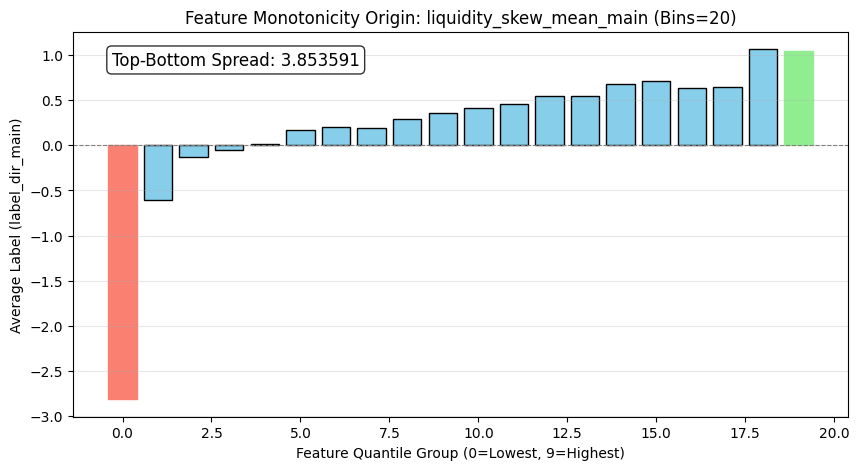

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_feature_spread(df, feature_col, label_col, quantile=0.1, group_by_day=True, day_col='trade_day'):
    """
    计算特征 Top N% 和 Bottom N% 的 Label 均值差 (Long-Short Spread)
    
    Args:
        df: DataFrame
        feature_col: 特征列名
        label_col: 标签列名 (预测目标，如收益率)
        quantile: 前后百分比 (默认 0.1，即 10%)
        group_by_day: 是否按天分组计算 (强烈建议 True，防止不同日期的市场Beta干扰)
        day_col: 日期列名 (当 group_by_day=True 时必填)
        
    Returns:
        dict: 包含 spread, top_mean, bottom_mean 的字典
    """
    
    # 内部函数：处理单个 Group 或整个 DataFrame
    def _calc_single_group(sub_df):
        # 去除空值
        sub_df = sub_df.dropna(subset=[feature_col, label_col])
        if len(sub_df) == 0:
            return pd.Series({'top': np.nan, 'bottom': np.nan, 'spread': np.nan})
            
        # 确定切分点
        n = len(sub_df)
        k = int(n * quantile)
        
        if k == 0: # 数据太少不足以切分
            return pd.Series({'top': np.nan, 'bottom': np.nan, 'spread': np.nan})
        
        # 按特征排序
        # ascending=True: 头部是小值(Bottom), 尾部是大值(Top)
        sorted_df = sub_df.sort_values(by=feature_col, ascending=True)
        
        # 提取 Bottom (特征最小的 10%)
        bottom_part = sorted_df.iloc[:k]
        # 提取 Top (特征最大的 10%)
        top_part = sorted_df.iloc[-k:]
        
        # 计算 Label 均值
        bottom_mean = bottom_part[label_col].mean()
        top_mean = top_part[label_col].mean()
        
        return pd.Series({
            'top_mean': top_mean,
            'bottom_mean': bottom_mean,
            'spread': top_mean - bottom_mean
        })

    # --- 模式 A: 按天分组计算 (推荐) ---
    if group_by_day:
        if day_col not in df.columns:
            raise ValueError(f"按天分组模式下，DataFrame 必须包含 '{day_col}' 列")
            
        print(f"正在按 {day_col} 分组计算每日 Spread...")
        daily_stats = df.groupby(day_col).apply(_calc_single_group)
        
        # 计算所有天数的平均值
        final_stats = daily_stats.mean()
        
        # 也可以返回 daily_stats 以便画出 spread 的时序图
        return {
            'spread': final_stats['spread'],
            'top_mean': final_stats['top_mean'], 
            'bottom_mean': final_stats['bottom_mean'],
            'daily_data': daily_stats # 附带每日详情
        }

    # --- 模式 B: 全局混合计算 (仅用于快速查看分布) ---
    else:
        result = _calc_single_group(df)
        return result.to_dict()

# ==========================================
# 2. 辅助：可视化函数 (分组柱状图)
# ==========================================
def plot_quantile_performance(df, feature_col, label_col, n_bins=20):
    """
    画出特征分层后的单调性柱状图
    """
    df_clean = df.dropna(subset=[feature_col, label_col]).copy()
    
    # 将特征分为 N 组
    # labeling=False 返回 0, 1, ... 9
    df_clean['group'] = pd.qcut(df_clean[feature_col], n_bins, labels=False, duplicates='drop')
    
    # 计算每组的 Label 均值
    group_means = df_clean.groupby('group')[label_col].mean()
    
    plt.figure(figsize=(10, 5))
    bars = plt.bar(group_means.index, group_means.values, color='skyblue', edgecolor='black')
    
    # 标记最高和最低组
    bars[0].set_color('salmon') # Bottom 10%
    bars[-1].set_color('lightgreen') # Top 10%
    
    plt.title(f"Feature Monotonicity Origin: {feature_col} (Bins={n_bins})")
    plt.xlabel("Feature Quantile Group (0=Lowest, 9=Highest)")
    plt.ylabel(f"Average Label ({label_col})")
    plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
    plt.grid(axis='y', alpha=0.3)
    
    # 计算简单的 spread
    spread = group_means.iloc[-1] - group_means.iloc[0]
    plt.text(0.05, 0.95, f"Top-Bottom Spread: {spread:.6f}", 
             transform=plt.gca().transAxes, fontsize=12, verticalalignment='top',
             bbox=dict(boxstyle="round", facecolor="white", alpha=0.8))
    
    plt.show()

# ==========================================
# 使用示例
# ==========================================
if __name__ == "__main__":
    
    plot_quantile_performance(final_merged_df, 'liquidity_skew_mean_main', 'label_dir_main', n_bins=20)

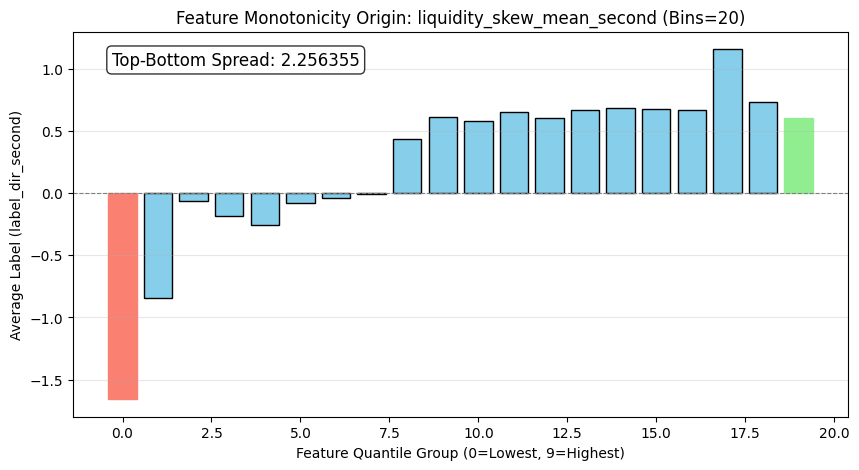

In [166]:
plot_quantile_performance(final_merged_df, 'liquidity_skew_mean_second', 'label_dir_second', n_bins=20)

In [117]:
final_merged_df['liquidity_skew_mean_second'].quantile(0.95)

np.float64(1.005931198304984)

In [123]:
final_merged_df.columns

Index(['type_main', 'source_main', 'trade_day_main', 'action_day_main',
       'inst_main', 'hms_main', 'ms_main', 'last_main', 'volume_main',
       'bp1_main',
       ...
       'dynamic_ask_price_second', 'dynamic_bid_price_second',
       'dynamic_spread_robust_second', 'impact_ask_second',
       'impact_bid_second', 'liquidity_skewness_second',
       'liquidity_skew_mean_second', 'dynamic_spread_robust_second_mean',
       'date', 'time_str'],
      dtype='object', length=187)

In [126]:
final_merged_df[(final_merged_df['liquidity_skew_mean_second']>1.006)&(final_merged_df['label_dir_second']<-6)][['timestamp','impact_ask_second','impact_bid_second','liquidity_skewness_second','liquidity_skew_mean_second']]

,timestamp,impact_ask_second,impact_bid_second,liquidity_skewness_second,liquidity_skew_mean_second
3525,2025-09-18 21:38:42.000,1.944017,1.500102,0.443915,1.025887
3526,2025-09-18 21:38:42.500,1.102170,1.750153,-0.647983,1.035651
3527,2025-09-18 21:38:43.000,1.102170,1.392966,-0.290797,1.024755
3978,2025-09-18 21:42:57.000,3.568675,0.637455,2.931220,1.046704
3979,2025-09-18 21:42:57.500,2.490119,0.000000,2.490119,1.086319
...,...,...,...,...,...
1974639,2025-11-13 11:24:42.500,4.239880,2.737745,1.502135,1.059816
1974640,2025-11-13 11:24:43.000,3.944554,1.604463,2.340090,1.060683
1974641,2025-11-13 11:24:43.500,2.098074,2.305978,-0.207905,1.061722
1974642,2025-11-13 11:24:44.000,0.000000,2.568264,-2.568264,1.036593


In [127]:
final_merged_df[(final_merged_df['liquidity_skew_mean_second']>1.006)&(final_merged_df['label_dir_second']<-6)]['impact_bid_second'].describe()

count    2.476300e+04
mean     2.773182e+00
std      2.501800e+00
min     -1.818989e-12
25%      9.070006e-01
50%      2.189643e+00
75%      3.892429e+00
max      2.613112e+01
Name: impact_bid_second, dtype: float64

In [109]:

daily_corr_main = final_merged_df.groupby('date').apply(
    lambda x: x['dynamic_spread_robust_main_mean'].corr(x['label_main'])
)

# 不活跃合约日均相关性
daily_corr_second = final_merged_df.groupby('date').apply(
    lambda x: x['dynamic_spread_robust_second_mean'].corr(x['label_second'])
)

# 3. 求均值 (Mean IC)
mean_ic_main = daily_corr_main.mean()
mean_ic_second = daily_corr_second.mean()

# 4. (可选) 计算 ICIR (信息比率) = 均值 / 标准差
icir_main = daily_corr_main.mean() / daily_corr_main.std()
icir_second = daily_corr_second.mean() / daily_corr_second.std()

print(f"主力合约日均相关性 (Mean IC): {mean_ic_main:.4f}, ICIR: {icir_main:.4f}")
print(f"不活跃合约日均相关性 (Mean IC): {mean_ic_second:.4f}, ICIR: {icir_second:.4f}")

# 查看每一天的具体相关性数值
print("\n主力合约每日相关性预览:")
print(daily_corr_main.head())

主力合约日均相关性 (Mean IC): 0.1790, ICIR: 1.9019
不活跃合约日均相关性 (Mean IC): 0.1545, ICIR: 1.4181

主力合约每日相关性预览:
date
2025-09-18    0.230900
2025-09-19    0.145829
2025-09-22    0.057679
2025-09-23    0.156460
2025-09-24    0.077288
dtype: float64


In [12]:
# final_merged_df = final_merged_df[pd.to_datetime(final_merged_df['date'])>=pd.to_datetime("2025-09-18")]
final_merged_df['dynamic_spread_robust_main_mean'].corr(final_merged_df['label_main']),final_merged_df['dynamic_spread_robust_second_mean'].corr(final_merged_df['label_second'])

(np.float64(0.3101260995222949), np.float64(0.2351361547156854))

In [111]:
df_result = df_result[pd.to_datetime(df_result['date'])>=pd.to_datetime("2025-09-18")]
df_result['spread_trunc_main_mean'].corr(df_result['label__main']),df_result['spread_trunc_second_mean'].corr(df_result['label__second'])

(np.float64(0.3140396631611134), np.float64(0.2266482419916067))

In [6]:
# df_result = df_result[pd.to_datetime(df_result['date'])>=pd.to_datetime("2025-09-18")]
df_result['spread_zero_main_mean'].corr(df_result['label__main']),df_result['spread_zero_second_mean'].corr(df_result['label__second'])

(np.float64(0.31401179655998385), np.float64(0.22657951289270806))

In [100]:

daily_corr_main = final_merged_df.groupby('date').apply(
    lambda x: x['dynamic_spread_robust_main_mean'].corr(x['label_main'])
)

# 不活跃合约日均相关性
daily_corr_second = final_merged_df.groupby('date').apply(
    lambda x: x['dynamic_spread_robust_second_mean'].corr(x['label_second'])
)
daily_corr_second = daily_corr_second[pd.to_datetime(daily_corr_second.index)>=pd.to_datetime('2025-09-18')]
# 3. 求均值 (Mean IC)
mean_ic_main = daily_corr_main.mean()
mean_ic_second = daily_corr_second.mean()

# 4. (可选) 计算 ICIR (信息比率) = 均值 / 标准差
icir_main = daily_corr_main.mean() / daily_corr_main.std()
icir_second = daily_corr_second.mean() / daily_corr_second.std()

print(f"主力合约日均相关性 (Mean IC): {mean_ic_main:.4f}, ICIR: {icir_main:.4f}")
print(f"不活跃合约日均相关性 (Mean IC): {mean_ic_second:.4f}, ICIR: {icir_second:.4f}")

# 查看每一天的具体相关性数值
print("\n主力合约每日相关性预览:")
print(daily_corr_main.head())

主力合约日均相关性 (Mean IC): 0.1905, ICIR: 1.6674
不活跃合约日均相关性 (Mean IC): 0.1545, ICIR: 1.4181

主力合约每日相关性预览:
date
2025-09-17    0.568283
2025-09-18    0.230900
2025-09-19    0.145829
2025-09-22    0.057679
2025-09-23    0.156460
dtype: float64


In [101]:
df_result.columns

Index(['timestamp', 'mid_price_main', 'adjusted_orderflow_main', 'label__main',
       'spread_trunc_main', 'spread_trunc_main_mean', 'spread_neighbor_main',
       'spread_neighbor_main_mean', 'spread_median_main',
       'spread_median_main_mean', 'spread_zero_main', 'spread_zero_main_mean',
       'mid_price_second', 'adjusted_orderflow_second', 'label__second',
       'spread_trunc_second', 'spread_trunc_second_mean',
       'spread_neighbor_second', 'spread_neighbor_second_mean',
       'spread_median_second', 'spread_median_second_mean',
       'spread_zero_second', 'spread_zero_second_mean', 'date'],
      dtype='object')

In [105]:

daily_corr_main = df_result.groupby('date').apply(
    lambda x: x['spread_neighbor_main_mean'].corr(x['label__main'])
)

# 不活跃合约日均相关性
daily_corr_second = df_result.groupby('date').apply(
    lambda x: x['spread_neighbor_second_mean'].corr(x['label__second'])
)
daily_corr_second = daily_corr_second[pd.to_datetime(daily_corr_second.index)>=pd.to_datetime('2025-09-18')]
# 3. 求均值 (Mean IC)
mean_ic_main = daily_corr_main.mean()
mean_ic_second = daily_corr_second.mean()

# 4. (可选) 计算 ICIR (信息比率) = 均值 / 标准差
icir_main = daily_corr_main.mean() / daily_corr_main.std()
icir_second = daily_corr_second.mean() / daily_corr_second.std()

print(f"主力合约日均相关性 (Mean IC): {mean_ic_main:.4f}, ICIR: {icir_main:.4f}")
print(f"不活跃合约日均相关性 (Mean IC): {mean_ic_second:.4f}, ICIR: {icir_second:.4f}")

# 查看每一天的具体相关性数值
print("\n主力合约每日相关性预览:")
print(daily_corr_main.head())

主力合约日均相关性 (Mean IC): 0.1904, ICIR: 1.6657
不活跃合约日均相关性 (Mean IC): 0.1544, ICIR: 1.4171

主力合约每日相关性预览:
date
2025-09-17    0.568272
2025-09-18    0.230989
2025-09-19    0.144986
2025-09-22    0.057159
2025-09-23    0.156408
dtype: float64


In [93]:
daily_corr_second.index

Index([2025-09-17, 2025-09-18, 2025-09-19, 2025-09-22, 2025-09-23, 2025-09-24,
       2025-09-25, 2025-09-26, 2025-09-29, 2025-10-09, 2025-10-10, 2025-10-13,
       2025-10-14, 2025-10-15, 2025-10-16, 2025-10-17, 2025-10-20, 2025-10-21,
       2025-10-22, 2025-10-23, 2025-10-24, 2025-10-27, 2025-10-28, 2025-10-29,
       2025-10-30, 2025-10-31, 2025-11-03, 2025-11-04, 2025-11-05, 2025-11-06,
       2025-11-07, 2025-11-10, 2025-11-11, 2025-11-12],
      dtype='object', name='date')

In [40]:
final_merged_df[['av1_second','bv1_second']].describe()

,av1_second,bv1_second
count,2.012371e+06,2.012371e+06
mean,3.971126e+00,4.065918e+00
std,6.352160e+00,7.231014e+00
min,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00
50%,2.000000e+00,2.000000e+00
75%,5.000000e+00,5.000000e+00
max,3.440000e+02,4.010000e+02


In [56]:
final_merged_df.to_pickle('final_merged_data_lee.pkl')

In [ ]:
final_merged_df['active_buy_vol_main']

正在聚合数据（计算日内均值）...
开始绘图...


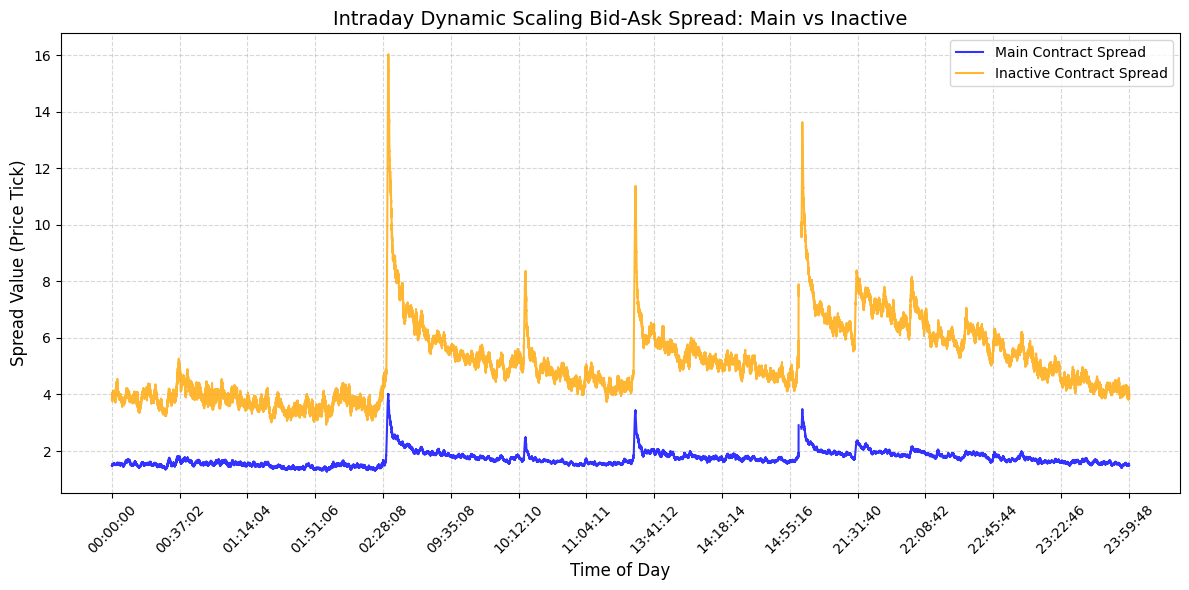

图表已保存为 'bid_ask_spread_comparison.png'


In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_bid_ask_spread(df):
    df['time_str'] = df['timestamp'].dt.strftime('%H:%M:%S')
    
    print("正在聚合数据（计算日内均值）...")
    # 按时间分组，同时计算两个合约价差的均值
    # resulting_df 的索引(index)将是 time_str
    agg_df = df.groupby('time_str')[['dynamic_spread_robust_main_mean', 'dynamic_spread_robust_second_mean']].mean()
    
    # 3. 绘图
    print("开始绘图...")
    plt.figure(figsize=(12, 6), dpi=100)
    
    # 绘制主力合约曲线
    plt.plot(agg_df.index, agg_df['dynamic_spread_robust_main_mean'], 
             label='Main Contract Spread', color='blue', linewidth=1.5, alpha=0.8)
    
    # 绘制不活跃合约曲线
    plt.plot(agg_df.index, agg_df['dynamic_spread_robust_second_mean'], 
             label='Inactive Contract Spread', color='orange', linewidth=1.5, alpha=0.8)
    
    # --- 图表美化 ---
    plt.title('Intraday Dynamic Scaling Bid-Ask Spread: Main vs Inactive', fontsize=14)
    plt.ylabel('Spread Value (Price Tick)', fontsize=12)
    plt.xlabel('Time of Day', fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    
    # --- X轴刻度优化 ---
    # 因为 tick 数据量很大，X轴标签会非常密集，这里进行稀疏化处理
    # 每隔 total_points / 15 个点显示一个时间标签
    n_ticks = 15
    step = max(1, len(agg_df) // n_ticks)
    plt.xticks(ticks=range(0, len(agg_df), step), 
               labels=agg_df.index[::step], 
               rotation=45)
    
    plt.tight_layout()
    
    # 保存或显示
    plt.savefig('bid_ask_spread_comparison.png')
    plt.show()
    print("图表已保存为 'bid_ask_spread_comparison.png'")

# ================= 执行 =================
# 假设 final_merged_df 是您之前合并好的变量
if __name__ == "__main__":
    # 如果 final_merged_df 还没生成，请先运行上一段合并代码
    # 这里直接调用函数
    if 'final_merged_df' in locals() and not final_merged_df.empty:
        plot_bid_ask_spread(final_merged_df)
    else:
        print("请先确保 final_merged_df 已经加载并包含数据。")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_bid_ask_spread(df):
    df['time_str'] = df['timestamp'].dt.strftime('%H:%M:%S')
    
    print("正在聚合数据（计算日内均值）...")
    # 按时间分组，同时计算两个合约价差的均值
    # resulting_df 的索引(index)将是 time_str
    agg_df = df.groupby('time_str')[['spread_neighbor_main_mean', 'spread_neighbor_second_mean']].mean()
    
    # 3. 绘图
    print("开始绘图...")
    plt.figure(figsize=(12, 6), dpi=100)
    
    # 绘制主力合约曲线
    plt.plot(agg_df.index, agg_df['spread_neighbor_main_mean'], 
             label='Main Contract Spread', color='blue', linewidth=1.5, alpha=0.8)
    
    # 绘制不活跃合约曲线
    plt.plot(agg_df.index, agg_df['spread_neighbor_second_mean'], 
             label='Inactive Contract Spread', color='orange', linewidth=1.5, alpha=0.8)
    
    # --- 图表美化 ---
    plt.title('Intraday Dynamic Scaling Bid-Ask Spread: Main vs Inactive', fontsize=14)
    plt.ylabel('Spread Value (Price Tick)', fontsize=12)
    plt.xlabel('Time of Day', fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    
    # --- X轴刻度优化 ---
    # 因为 tick 数据量很大，X轴标签会非常密集，这里进行稀疏化处理
    # 每隔 total_points / 15 个点显示一个时间标签
    n_ticks = 15
    step = max(1, len(agg_df) // n_ticks)
    plt.xticks(ticks=range(0, len(agg_df), step), 
               labels=agg_df.index[::step], 
               rotation=45)
    
    plt.tight_layout()
    
    # 保存或显示
    plt.savefig('bid_ask_spread_comparison.png')
    plt.show()
    print("图表已保存为 'bid_ask_spread_comparison.png'")

# ================= 执行 =================
# 假设 final_merged_df 是您之前合并好的变量
if __name__ == "__main__":
    plot_bid_ask_spread(df_result)


正在聚合数据（计算日内均值）...
开始绘图...


KeyError: 'spread_neighbor_second'

Error in callback <function _draw_all_if_interactive at 0x7032a864e980> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [83]:
final_merged_df[final_merged_df['av4_main']>2*final_merged_df['dynamic_target_size_main']]

,type_main,source_main,trade_day_main,action_day_main,inst_main,hms_main,ms_main,last_main,volume_main,bp1_main,...,trade_qty_second,dynamic_target_size_second,dynamic_orderflow_second,adjusted_orderflow_second,dynamic_ask_price_second,dynamic_bid_price_second,dynamic_spread_robust_second,dynamic_spread_robust_second_mean,date,time_str
11499,D,M,2025-09-18,2025-09-17,ag2512,2025-09-17 23:38:23,0,9966.0,169076,9966.0,...,0.0,23.0,0.383333,0.383333,10017.0,10016.0,1.0,1.800000,2025-09-17,23:38:23
11500,D,M,2025-09-18,2025-09-17,ag2512,2025-09-17 23:38:23,500,9966.0,169076,9966.0,...,0.0,22.0,0.366667,0.366667,10017.0,10016.0,1.0,1.791667,2025-09-17,23:38:23
11501,D,M,2025-09-18,2025-09-17,ag2512,2025-09-17 23:38:28,500,9967.0,169078,9966.0,...,0.0,22.0,0.366667,0.366667,10017.0,10016.0,1.0,1.775000,2025-09-17,23:38:28
11502,D,M,2025-09-18,2025-09-17,ag2512,2025-09-17 23:38:35,0,9966.0,169109,9966.0,...,0.0,22.0,0.366667,0.366667,10017.0,10016.0,1.0,1.766667,2025-09-17,23:38:35
11504,D,M,2025-09-18,2025-09-17,ag2512,2025-09-17 23:38:37,0,9966.0,169123,9966.0,...,0.0,19.0,0.316667,0.316667,10017.0,10016.0,1.0,1.766667,2025-09-17,23:38:37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1930759,D,M,2025-11-12,2025-11-12,ag2512,2025-11-12 01:45:01,500,11915.0,385168,11914.0,...,0.0,5.0,0.083333,1.060135,11960.0,11958.0,2.0,1.830929,2025-11-11,01:45:01
1930760,D,M,2025-11-12,2025-11-12,ag2512,2025-11-12 01:45:02,0,11915.0,385168,11914.0,...,0.0,5.0,0.083333,1.060135,11960.0,11958.0,2.0,1.830929,2025-11-11,01:45:02
1930761,D,M,2025-11-12,2025-11-12,ag2512,2025-11-12 01:45:02,500,11915.0,385168,11914.0,...,0.0,5.0,0.083333,1.060135,11961.0,11958.0,3.0,1.839262,2025-11-11,01:45:02
1930762,D,M,2025-11-12,2025-11-12,ag2512,2025-11-12 01:45:03,0,11915.0,385168,11914.0,...,0.0,5.0,0.083333,1.060135,11960.0,11958.0,2.0,1.839262,2025-11-11,01:45:03


In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
final_merged_df['delta_orderflow_main'] = final_merged_df['dynamic_buy_orderflow_main'] - final_merged_df['dynamic_sell_orderflow_main']
final_merged_df[final_merged_df['delta_orderflow_main'].abs()>=50][['timestamp','dynamic_buy_orderflow_main','dynamic_sell_orderflow_main']]

,timestamp,dynamic_buy_orderflow_main,dynamic_sell_orderflow_main
59,2025-09-18 21:00:29.000,134.033333,191.166667
60,2025-09-18 21:00:29.500,134.033333,192.500000
61,2025-09-18 21:00:30.000,119.633333,176.800000
63,2025-09-18 21:00:31.500,92.616667,149.483333
66,2025-09-18 21:00:33.000,87.616667,137.750000
...,...,...,...
1959457,2025-11-13 09:00:26.500,74.566667,126.700000
1959458,2025-11-13 09:00:27.000,74.783333,126.916667
1959459,2025-11-13 09:00:27.500,75.100000,127.233333
1959460,2025-11-13 09:00:28.000,75.800000,126.666667


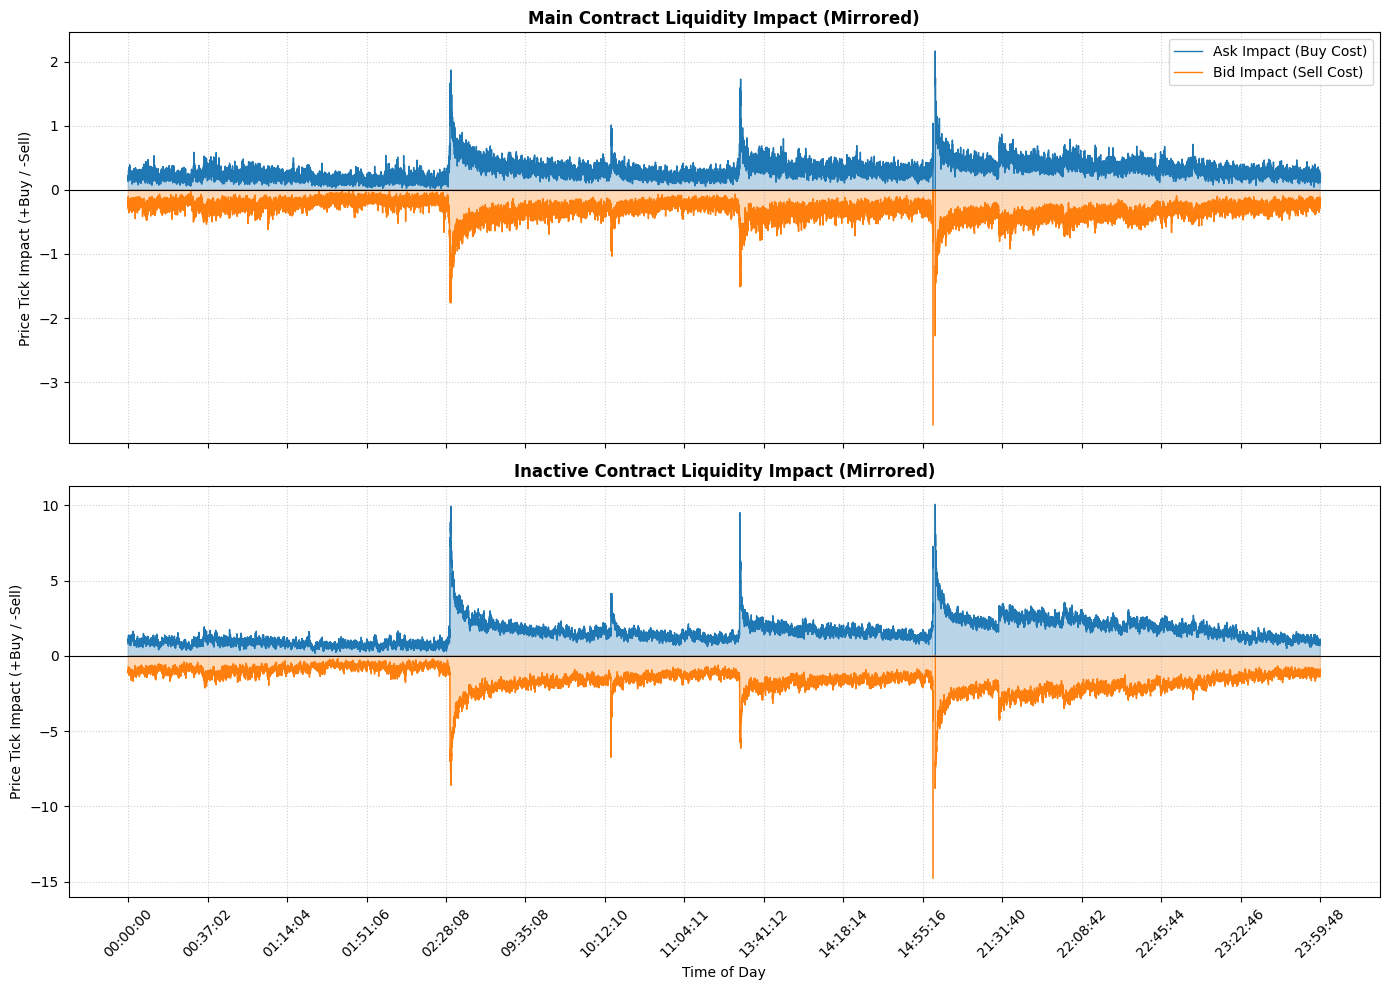

图表已生成：正半轴代表买方冲击，负半轴代表卖方冲击。


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def plot_mirrored_spread(df):
    """
    绘制镜像流动性价差图
    Top Subplot: 主力合约
    Bottom Subplot: 不活跃合约
    Y轴: 正值为 Ask Impact, 负值为 Bid Impact
    """
    # 1. 准备数据
    # 计算单边价差（绝对值）
    # Ask Impact = Dynamic_Ask - Ap1
    df['impact_ask_main'] = (df['dynamic_ask_price_main'] - df['ap1_main']).abs()
    # Bid Impact = Bp1 - Dynamic_Bid
    df['impact_bid_main'] = (df['bp1_main'] - df['dynamic_bid_price_main']).abs()
    
    df['impact_ask_second'] = (df['dynamic_ask_price_second'] - df['ap1_second']).abs()
    df['impact_bid_second'] = (df['bp1_second'] - df['dynamic_bid_price_second']).abs()

    # 提取时间
    df['time_str'] = df['timestamp'].dt.strftime('%H:%M:%S')
    
    # 聚合
    cols = ['impact_ask_main', 'impact_bid_main', 'impact_ask_second', 'impact_bid_second']
    agg_df = df.groupby('time_str')[cols].mean()
    
    # 2. 设置画布 (上下两图)
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True, dpi=100)
    
    # ================= 子图 1: 主力合约 =================
    x = range(len(agg_df))
    y_ask = agg_df['impact_ask_main']
    y_bid = -agg_df['impact_bid_main'] # 关键：取负值，画在下方
    
    # 绘制线条
    ax1.plot(x, y_ask, color='#1f77b4', linewidth=1, label='Ask Impact (Buy Cost)')
    ax1.plot(x, y_bid, color='#ff7f0e', linewidth=1, label='Bid Impact (Sell Cost)')
    
    # 填充区域 (形成带宽)
    ax1.fill_between(x, y_ask, 0, color='#1f77b4', alpha=0.3) # 上方填充蓝
    ax1.fill_between(x, y_bid, 0, color='#ff7f0e', alpha=0.3) # 下方填充橙
    
    # 辅助线
    ax1.axhline(0, color='black', linewidth=0.8, linestyle='-')
    ax1.set_title('Main Contract Liquidity Impact (Mirrored)', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Price Tick Impact (+Buy / -Sell)')
    ax1.legend(loc='upper right')
    ax1.grid(True, linestyle=':', alpha=0.6)

    # ================= 子图 2: 不活跃合约 =================
    y_ask_sec = agg_df['impact_ask_second']
    y_bid_sec = -agg_df['impact_bid_second']
    
    ax2.plot(x, y_ask_sec, color='#1f77b4', linewidth=1, label='Ask Impact')
    ax2.plot(x, y_bid_sec, color='#ff7f0e', linewidth=1, label='Bid Impact')
    
    ax2.fill_between(x, y_ask_sec, 0, color='#1f77b4', alpha=0.3)
    ax2.fill_between(x, y_bid_sec, 0, color='#ff7f0e', alpha=0.3)
    
    ax2.axhline(0, color='black', linewidth=0.8, linestyle='-')
    ax2.set_title('Inactive Contract Liquidity Impact (Mirrored)', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Price Tick Impact (+Buy / -Sell)')
    ax2.set_xlabel('Time of Day')
    ax2.grid(True, linestyle=':', alpha=0.6)
    
    # ================= 公共设置 =================
    # X轴刻度稀疏化
    n_ticks = 15
    step = max(1, len(agg_df) // n_ticks)
    
    # 设置刻度
    plt.xticks(ticks=range(0, len(agg_df), step), labels=agg_df.index[::step], rotation=45)
    
    plt.tight_layout()
    plt.savefig('mirrored_spread_comparison.png')
    plt.show()
    print("图表已生成：正半轴代表买方冲击，负半轴代表卖方冲击。")

# 调用
if __name__ == "__main__":
    if 'final_merged_df' in locals():
        plot_mirrored_spread(final_merged_df)

In [34]:
final_merged_df['liquidity_skewness_main'] = final_merged_df['impact_ask_main'] - final_merged_df['impact_bid_main']
final_merged_df['liquidity_skewness_second'] = final_merged_df['impact_ask_second'] - final_merged_df['impact_bid_second']

In [23]:
final_merged_df[final_merged_df['dynamic_spread_robust_main_mean']>=10.0]

,type_main,source_main,trade_day_main,action_day_main,inst_main,hms_main,ms_main,last_main,volume_main,bp1_main,...,dynamic_sell_orderflow_second,dynamic_orderflow_total_second,adjusted_buy_flow_second,adjusted_sell_flow_second,dynamic_ask_price_second,dynamic_bid_price_second,dynamic_spread_robust_second,dynamic_spread_robust_second_mean,date,time_str
582715,D,M,2025-10-14,2025-10-14,ag2512,2025-10-14 13:40:03,0,11780.0,1483184,11780.0,...,13.266667,35.733333,497.471236,293.758979,11833.261081,11809.809488,23.451593,21.565254,2025-10-13,13:40:03
582716,D,M,2025-10-14,2025-10-14,ag2512,2025-10-14 13:40:03,500,11784.0,1483347,11781.0,...,12.900000,35.566667,501.899764,285.640012,11834.489531,11816.492946,17.996584,21.599700,2025-10-13,13:40:03
582717,D,M,2025-10-14,2025-10-14,ag2512,2025-10-14 13:40:04,0,11782.0,1483504,11784.0,...,14.233333,36.566667,494.518885,315.163528,11833.176565,11809.789626,23.386939,21.673713,2025-10-13,13:40:04
582718,D,M,2025-10-14,2025-10-14,ag2512,2025-10-14 13:40:04,500,11787.0,1483684,11787.0,...,14.233333,35.766667,476.804775,315.163528,11842.025959,11811.339299,30.686661,21.808886,2025-10-13,13:40:04
582719,D,M,2025-10-14,2025-10-14,ag2512,2025-10-14 13:40:05,0,11788.0,1483810,11788.0,...,14.166667,35.766667,478.280951,313.687352,11848.223787,11816.754076,31.469711,21.938069,2025-10-13,13:40:05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794023,D,M,2025-10-20,2025-10-17,ag2512,2025-10-17 21:36:32,500,11782.0,446178,11782.0,...,16.866667,26.500000,188.556234,330.136521,11847.283815,11804.117018,43.166797,27.978077,2025-10-17,21:36:32
794024,D,M,2025-10-20,2025-10-17,ag2512,2025-10-17 21:36:33,0,11785.0,446352,11784.0,...,16.866667,26.166667,182.031797,330.136521,11844.653021,11808.640528,36.012493,28.073554,2025-10-17,21:36:33
794025,D,M,2025-10-20,2025-10-17,ag2512,2025-10-17 21:36:33,500,11785.0,446477,11785.0,...,17.366667,26.433333,177.464691,339.923177,11845.427412,11810.677584,34.749828,28.160352,2025-10-17,21:36:33
794026,D,M,2025-10-20,2025-10-17,ag2512,2025-10-17 21:36:34,0,11785.0,446780,11784.0,...,17.033333,26.100000,177.464691,333.398740,11848.052403,11805.141511,42.910892,28.334933,2025-10-17,21:36:34


正在聚合数据（计算日内均值）...
开始绘图...


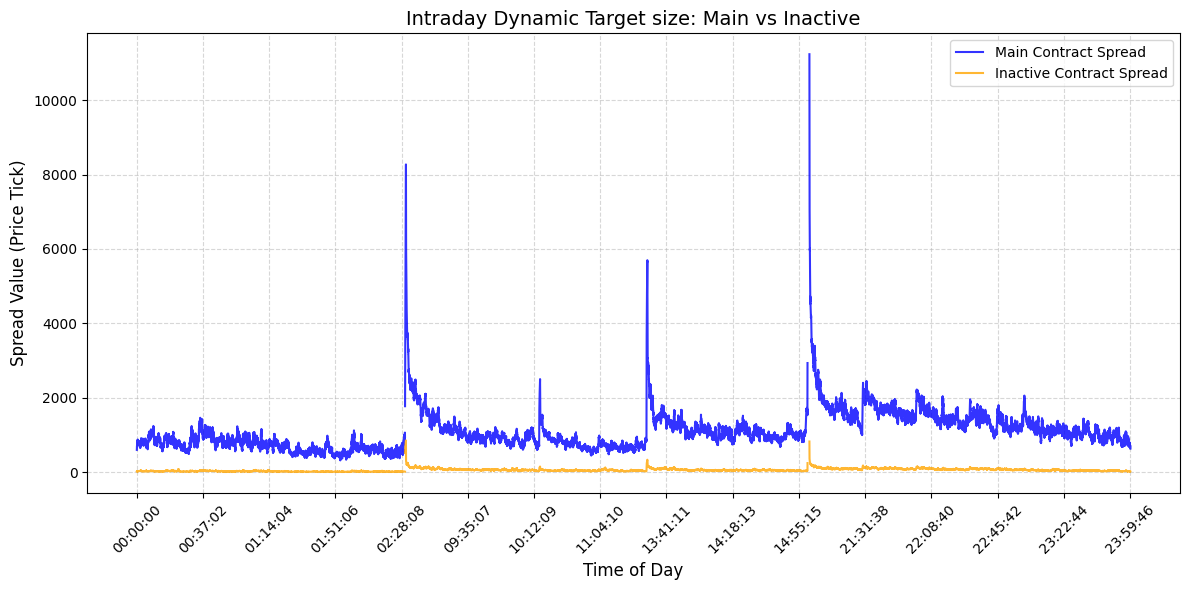

图表已保存为 'bid_ask_spread_comparison.png'


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_bid_ask_spread(df):
    df['time_str'] = df['timestamp'].dt.strftime('%H:%M:%S')
    
    print("正在聚合数据（计算日内均值）...")
    # 按时间分组，同时计算两个合约价差的均值
    # resulting_df 的索引(index)将是 time_str
    agg_df = df.groupby('time_str')[['dynamic_target_size_main', 'dynamic_target_size_second']].mean()
    
    # 3. 绘图
    print("开始绘图...")
    plt.figure(figsize=(12, 6), dpi=100)
    
    # 绘制主力合约曲线
    plt.plot(agg_df.index, agg_df['dynamic_target_size_main'], 
             label='Main Contract Spread', color='blue', linewidth=1.5, alpha=0.8)
    
    # 绘制不活跃合约曲线
    plt.plot(agg_df.index, agg_df['dynamic_target_size_second'], 
             label='Inactive Contract Spread', color='orange', linewidth=1.5, alpha=0.8)
    
    # --- 图表美化 ---
    plt.title('Intraday Dynamic Target size: Main vs Inactive', fontsize=14)
    plt.ylabel('Spread Value (Price Tick)', fontsize=12)
    plt.xlabel('Time of Day', fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    
    # --- X轴刻度优化 ---
    # 因为 tick 数据量很大，X轴标签会非常密集，这里进行稀疏化处理
    # 每隔 total_points / 15 个点显示一个时间标签
    n_ticks = 15
    step = max(1, len(agg_df) // n_ticks)
    plt.xticks(ticks=range(0, len(agg_df), step), 
               labels=agg_df.index[::step], 
               rotation=45)
    
    plt.tight_layout()
    
    # 保存或显示
    plt.savefig('bid_ask_spread_comparison.png')
    plt.show()
    print("图表已保存为 'bid_ask_spread_comparison.png'")

# ================= 执行 =================
# 假设 final_merged_df 是您之前合并好的变量
if __name__ == "__main__":
    # 如果 final_merged_df 还没生成，请先运行上一段合并代码
    # 这里直接调用函数
    if 'final_merged_df' in locals() and not final_merged_df.empty:
        plot_bid_ask_spread(final_merged_df)
    else:
        print("请先确保 final_merged_df 已经加载并包含数据。")

In [76]:
final_merged_df[final_merged_df['dynamic_spread_main']>=5.0]

,type_main,source_main,trade_day_main,action_day_main,inst_main,hms_main,ms_main,last_main,volume_main,bp1_main,...,trade_qty_second,dynamic_target_size_second,dynamic_ask_price_second,dynamic_bid_price_second,dynamic_spread_second,l1_spread_mean_second,dynamic_mean_second,spread_main,spread_second,time_str
3,D,M,2025-10-13,2025-10-10,ag2512,2025-10-10 21:00:01,0,11185.0,2228,11180.0,...,41.0,NaN,11217.000000,11210.000000,7.000000,NaN,NaN,5.0,7.0,21:00:01
4,D,M,2025-10-13,2025-10-10,ag2512,2025-10-10 21:00:01,500,11179.0,2646,11174.0,...,33.0,NaN,11221.000000,11217.000000,4.000000,NaN,NaN,5.0,4.0,21:00:01
8,D,M,2025-10-13,2025-10-10,ag2512,2025-10-10 21:00:03,500,11166.0,3807,11161.0,...,4.0,NaN,11207.000000,11206.000000,1.000000,NaN,NaN,5.0,1.0,21:00:03
59,D,M,2025-10-13,2025-10-10,ag2512,2025-10-10 21:00:29,0,11150.0,11383,11148.0,...,0.0,564.0,11193.723404,11185.212766,8.510638,NaN,NaN,2.0,6.0,21:00:29
60,D,M,2025-10-13,2025-10-10,ag2512,2025-10-10 21:00:29,500,11145.0,11484,11145.0,...,1.0,565.0,11191.150442,11186.061947,5.088496,NaN,NaN,4.0,4.0,21:00:29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2051878,D,M,2025-10-14,2025-10-14,ag2512,2025-10-14 14:52:52,0,11490.0,2378120,11490.0,...,0.0,65.0,11538.000000,11534.000000,4.000000,2.541667,2.582618,1.0,4.0,14:52:52
2051902,D,M,2025-10-14,2025-10-14,ag2512,2025-10-14 14:53:04,0,11489.0,2379117,11489.0,...,2.0,54.0,11533.000000,11531.000000,2.000000,2.566667,2.607618,1.0,2.0,14:53:04
2052428,D,M,2025-10-14,2025-10-14,ag2512,2025-10-14 14:57:29,0,11520.0,2406871,11516.0,...,1.0,67.0,11559.000000,11556.000000,3.000000,2.291667,2.291667,4.0,3.0,14:57:29
2052429,D,M,2025-10-14,2025-10-14,ag2512,2025-10-14 14:57:29,500,11517.0,2406908,11517.0,...,7.0,73.0,11563.000000,11558.000000,5.000000,2.316667,2.316667,5.0,5.0,14:57:29


In [31]:
final_merged_df['time_str']

0          18:39:24
1          20:59:00
2          21:00:00
3          21:00:01
4          21:00:01
             ...   
2052718    14:59:57
2052719    14:59:58
2052720    14:59:59
2052721    14:59:59
2052722    15:00:00
Name: time_str, Length: 2052723, dtype: object

<>:30: SyntaxWarning: invalid escape sequence '\m'
<>:30: SyntaxWarning: invalid escape sequence '\s'
<>:30: SyntaxWarning: invalid escape sequence '\m'
<>:30: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_1374209/144234889.py:30: SyntaxWarning: invalid escape sequence '\m'
  axes[0, 0].plot(x, p_norm, 'r-', linewidth=2, label=f'Normal Fit\n($\mu={mu:.2f}, \sigma={std:.2f}$)')
/tmp/ipykernel_1374209/144234889.py:30: SyntaxWarning: invalid escape sequence '\s'
  axes[0, 0].plot(x, p_norm, 'r-', linewidth=2, label=f'Normal Fit\n($\mu={mu:.2f}, \sigma={std:.2f}$)')


注意：已过滤 20385 个非正数值（对数正态拟合需要正数）。


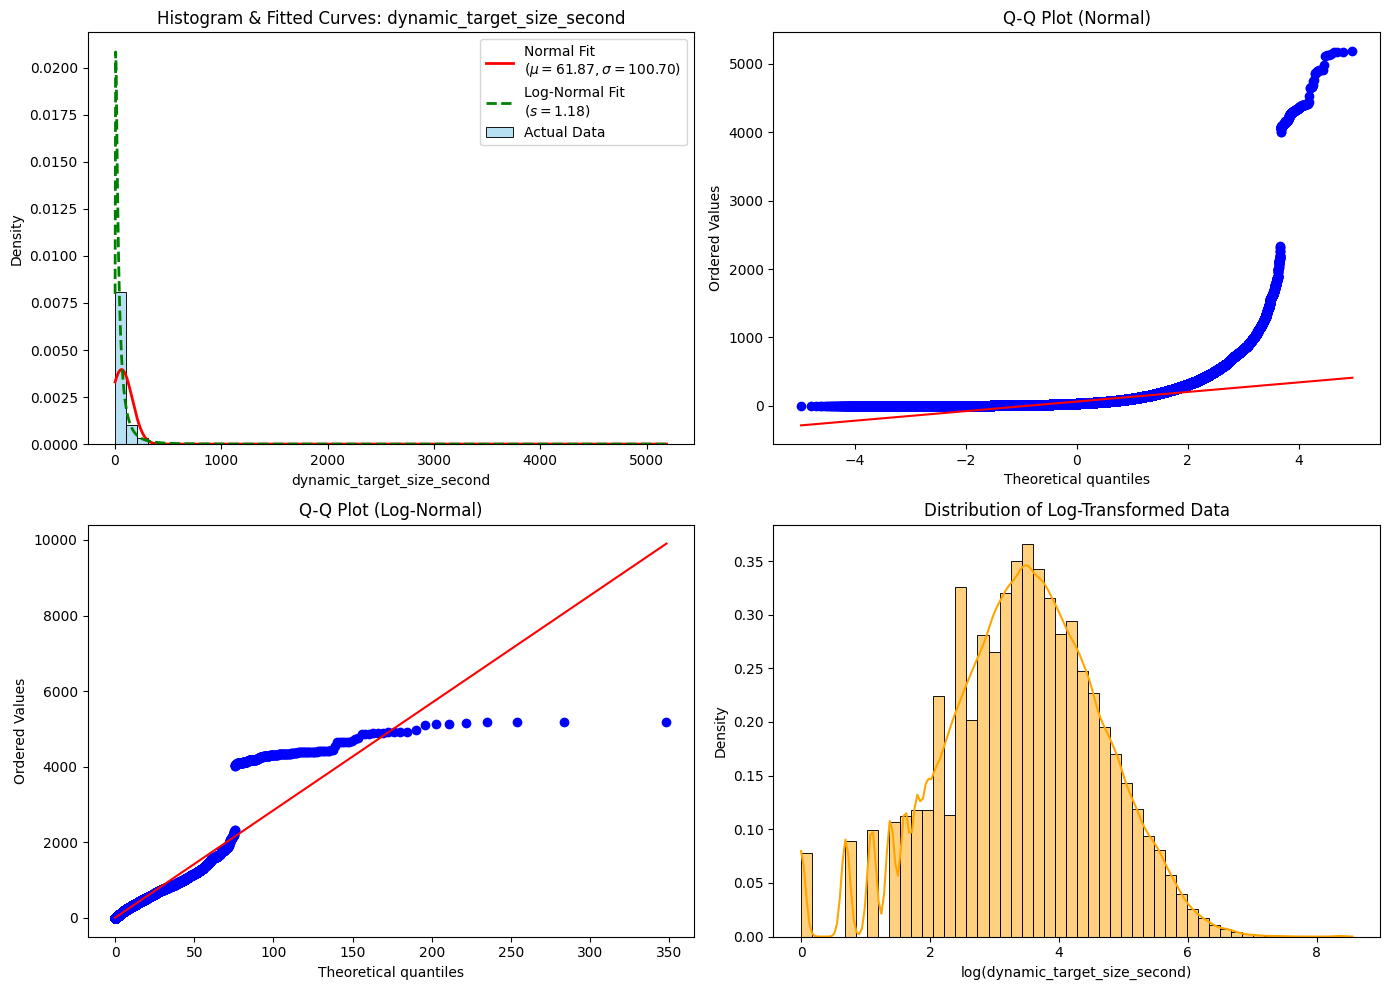

------------------------------
统计检验结果 (K-S Test):
1. 正态分布拟合误差 (D值): 0.2728 (p=0.00e+00)
2. 对数正态拟合误差 (D值): 0.0167 (p=0.00e+00)
------------------------------
结论：列 'dynamic_target_size_second' 更接近 【对数正态分布】


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

def check_distribution(df, col_name):
    """
    绘制指定列的分布图，对比正态分布和对数正态分布的拟合情况
    """
    # 1. 数据清洗（去除空值和非正数，因为对数正态要求数据>0）
    original_data = df[col_name].dropna()
    data = original_data[original_data > 0]
    
    if len(data) < len(original_data):
        print(f"注意：已过滤 {len(original_data) - len(data)} 个非正数值（对数正态拟合需要正数）。")

    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # -------------------------------------------------------
    # 图1：直方图 + 拟合曲线 (最直观的对比)
    # -------------------------------------------------------
    sns.histplot(data, kde=False, stat="density", bins=50, ax=axes[0, 0], color='skyblue', label='Actual Data', alpha=0.6)
    
    x = np.linspace(data.min(), data.max(), 1000)
    
    # 拟合正态分布
    mu, std = stats.norm.fit(data)
    p_norm = stats.norm.pdf(x, mu, std)
    axes[0, 0].plot(x, p_norm, 'r-', linewidth=2, label=f'Normal Fit\n($\mu={mu:.2f}, \sigma={std:.2f}$)')
    
    # 拟合对数正态分布 (s=shape/sigma, scale=exp(mu))
    s, loc, scale = stats.lognorm.fit(data)
    p_lognorm = stats.lognorm.pdf(x, s, loc, scale)
    axes[0, 0].plot(x, p_lognorm, 'g--', linewidth=2, label=f'Log-Normal Fit\n($s={s:.2f}$)')
    
    axes[0, 0].set_title(f'Histogram & Fitted Curves: {col_name}')
    axes[0, 0].legend()
    
    # -------------------------------------------------------
    # 图2：正态分布 Q-Q 图
    # -------------------------------------------------------
    # 如果点贴合红线，说明符合正态分布
    stats.probplot(data, dist="norm", plot=axes[0, 1])
    axes[0, 1].set_title('Q-Q Plot (Normal)')
    
    # -------------------------------------------------------
    # 图3：对数正态分布 Q-Q 图
    # -------------------------------------------------------
    # 如果点贴合红线，说明符合对数正态分布
    stats.probplot(data, dist="lognorm", sparams=(s,), plot=axes[1, 0])
    axes[1, 0].set_title('Q-Q Plot (Log-Normal)')
    
    # -------------------------------------------------------
    # 图4：对数变换后的分布
    # -------------------------------------------------------
    # 对数正态分布的本质：取对数后呈现正态分布
    log_data = np.log(data)
    sns.histplot(log_data, kde=True, stat="density", bins=50, ax=axes[1, 1], color='orange')
    axes[1, 1].set_title('Distribution of Log-Transformed Data')
    axes[1, 1].set_xlabel(f'log({col_name})')

    plt.tight_layout()
    plt.show() # 如果在脚本中运行请改为 plt.savefig('dist_analysis.png')
    
    # -------------------------------------------------------
    # 统计检验 (Kolmogorov-Smirnov Test)
    # -------------------------------------------------------
    # D statistic (statistic值) 越小，说明拟合越好
    print("-" * 30)
    print("统计检验结果 (K-S Test):")
    
    ks_norm = stats.kstest(data, 'norm', args=(mu, std))
    ks_lognorm = stats.kstest(data, 'lognorm', args=(s, loc, scale))
    
    print(f"1. 正态分布拟合误差 (D值): {ks_norm.statistic:.4f} (p={ks_norm.pvalue:.2e})")
    print(f"2. 对数正态拟合误差 (D值): {ks_lognorm.statistic:.4f} (p={ks_lognorm.pvalue:.2e})")
    
    print("-" * 30)
    if ks_lognorm.statistic < ks_norm.statistic:
        print(f"结论：列 '{col_name}' 更接近 【对数正态分布】")
    else:
        print(f"结论：列 '{col_name}' 更接近 【正态分布】")

# ================= 使用示例 =================
# 假设您的 dataframe 叫 final_merged_df，想分析 'l1_spread' 列
check_distribution(final_merged_df, 'dynamic_target_size_second')

In [21]:
final_merged_df[['dynamic_target_size_main','dynamic_target_size_second']].describe()

,dynamic_target_size_main,dynamic_target_size_second
count,2.050659e+06,2.050658e+06
mean,1.123429e+03,6.125295e+01
std,1.257784e+03,1.003859e+02
min,1.500000e+01,0.000000e+00
25%,4.040000e+02,1.400000e+01
50%,7.370000e+02,3.200000e+01
75%,1.366000e+03,7.100000e+01
max,3.617100e+04,5.187000e+03


In [9]:
final_merged_df['dynamic_mean_1tick_main'].corr(final_merged_df['label_main']),final_merged_df['dynamic_mean_1tick_second'].corr(final_merged_df['label_second'])

(np.float64(0.3184092472743839), np.float64(0.2090145428150188))

In [10]:
final_merged_df['dynamic_mean_6tick_main'].corr(final_merged_df['label_main']),final_merged_df['dynamic_mean_6tick_second'].corr(final_merged_df['label_second'])

(np.float64(0.32108158698232586), np.float64(0.26744550229665076))

In [52]:
final_merged_df['dynamic_mean_2tick_main'].corr(final_merged_df['label_main']),final_merged_df['dynamic_mean_2tick_second'].corr(final_merged_df['label_second'])

(np.float64(0.3176091151231156), np.float64(0.26514990932405097))

In [106]:
final_merged_df['dynamic_spread_robust_main_mean'].corr(final_merged_df['label_main']),final_merged_df['dynamic_spread_robust_second_mean'].corr(final_merged_df['label_second'])

(np.float64(0.3184017354268176), np.float64(0.2281808472674969))

In [16]:
final_merged_df['dynamic_spread_robust_main_mean'].corr(final_merged_df['label_main']),final_merged_df['dynamic_spread_robust_second_mean'].corr(final_merged_df['label_second'])

(np.float64(0.3142421655877612), np.float64(0.22740537860744417))

In [11]:
final_merged_df['dynamic_mean_10tick_main'].corr(final_merged_df['label_main']),final_merged_df['dynamic_mean_10tick_second'].corr(final_merged_df['label_second'])

(np.float64(0.315164427380265), np.float64(0.26864261613385504))

In [3]:
final_merged_df['deep_spread_mean_main'].corr(final_merged_df['label_main']),final_merged_df['deep_spread_mean_second'].corr(final_merged_df['label_second'])

(np.float64(0.03594939683864474), np.float64(0.11869354280228733))

In [81]:
final_merged_df['l1_spread_mean_main'].corr(final_merged_df['label_main']),final_merged_df['l1_spread_mean_second'].corr(final_merged_df['label_second'])

(np.float64(0.27260910668806915), np.float64(0.15836068507391166))